In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import seaborn as sns  ## veri g√∂rseli i√ßin
import numpy as np
import matplotlib.pyplot as plt  ## veri g√∂rseli i√ßin

# **1.Dataset hakkƒ±nda teknik bilgi**

In [ ]:
#Dosya yOLU
Dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/Veriler.csv'

#Verisetini Y√ºkler
df = pd.read_csv(Dosya_yolu)

#ƒ∞lk be≈ü satƒ±r g√∂ster.
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veriler 7 s√ºtundan olu≈üur: age : int, sex: string, bmi: float, children: int, smoker: String (evet veya hayƒ±r), region: string ve chrges: float - 1338 satƒ±r


In [ ]:
df.isna().any()
##Eksik deƒüerleri algƒ±la. Deƒüerlerin NA olup olmadƒ±ƒüƒ±nƒ± belirten aynƒ± boyutta bir boole nesnesi d√∂nd√ºr.
#None veya numpy.NaN gibi NA deƒüerleri True deƒüerlerine e≈ülenir


age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
df[df.duplicated(keep=False)]
#Yinelenen satƒ±rlarƒ± yazdƒ±r.

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

Veri K√ºmesinde [195-581] yalnƒ±zca 2 yinelenen satƒ±r var


# **2.Tek Deƒüi≈ükenli Analiz:**


In [ ]:
df.describe()
#Her sayƒ±sal deƒüi≈ükenin (√∂rneƒüin, ya≈ü, BMI, √ºcretler) daƒüƒ±lƒ±mƒ± nedir?

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Text(0.5, 0.98, 'Her Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±')

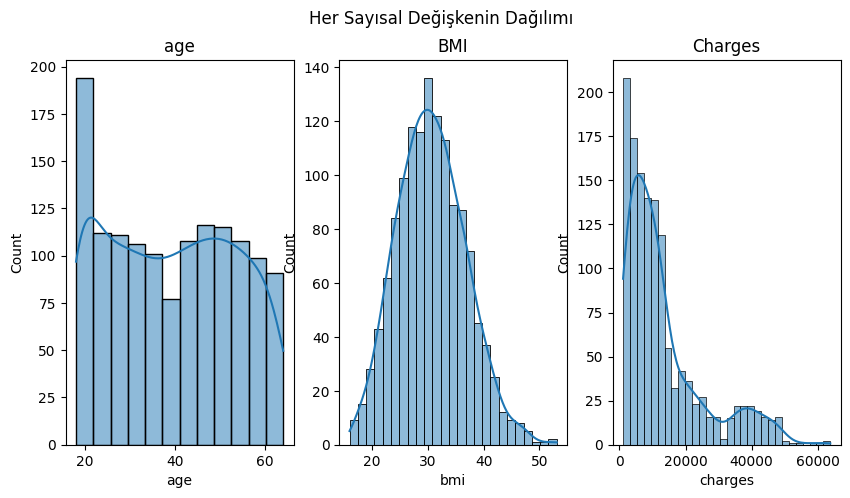

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,5))
# Verimizi g√∂rselle≈ütirmek i√ßin bir fig√ºr olu≈üturur ve 1 satƒ±r, 3 s√ºtundan olu≈üan bir grid yapƒ±sƒ± ekler.
sns.histplot(ax=axs[0],data=df,x="age",kde=True)
# ƒ∞lk eksende (axs[0]) 'age' (ya≈ü) s√ºtununun histogramƒ±nƒ± √ßekirdek yoƒüunluk tahmini (KDE) ile √ßizer.
axs[0].title.set_text("age")
# ƒ∞lk eksenin ba≈ülƒ±ƒüƒ±nƒ± "age" (ya≈ü) olarak ayarlar.
sns.histplot(ax=axs[1],data=df,x="bmi",kde=True)
# ƒ∞kinci eksende (axs[1]) 'bmi' s√ºtununun histogramƒ±nƒ± √ßekirdek yoƒüunluk tahmini (KDE) ile √ßizer.
axs[1].title.set_text("BMI")
# ƒ∞kinci eksenin ba≈ülƒ±ƒüƒ±nƒ± "BMI" olarak ayarlar.
sns.histplot(ax=axs[2],data=df,x="charges",kde=True)
# √ú√ß√ºnc√º eksende (axs[2]) 'charges' s√ºtununun histogramƒ±nƒ± √ßekirdek yoƒüunluk tahmini (KDE) ile √ßizer.
axs[2].title.set_text("Charges")
# √ú√ß√ºnc√º eksenin ba≈ülƒ±ƒüƒ±nƒ± "Charges" olarak ayarlar.
plt.suptitle("Her Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±")
# T√ºm fig√ºr√ºn genel ba≈ülƒ±ƒüƒ±nƒ± "Distribution of Each Numerical Variable" (Her Bir Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±) olarak ayarlar.

age: Daƒüƒ±lƒ±m neredeyse tekd√ºzedir, 20 civarƒ±nda bir tepe ve 40-50 civarƒ±nda daha k√º√ß√ºk bir tepe vardƒ±r. Daha gen√ß bireyler veri setine hakimdir.

BMI: √áan ≈üeklindeki daƒüƒ±lƒ±m 30'da zirveye ula≈üƒ±r ve bu da √ßoƒüu bireyin a≈üƒ±rƒ± kilolu olduƒüunu g√∂sterir (BMI ‚â• 25). Aykƒ±rƒ± deƒüerler nadirdir.

charges: √áoƒüu deƒüerin 20.000'in altƒ±nda olduƒüu saƒüa eƒüimli daƒüƒ±lƒ±m. Birka√ß u√ß deƒüer, saƒülƒ±k harcamalarƒ±ndaki farklƒ±lƒ±klarƒ± yansƒ±tan √ßok y√ºksek maliyetlere neden olur.


Text(0.5, 0.98, 'Her Bir Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±')

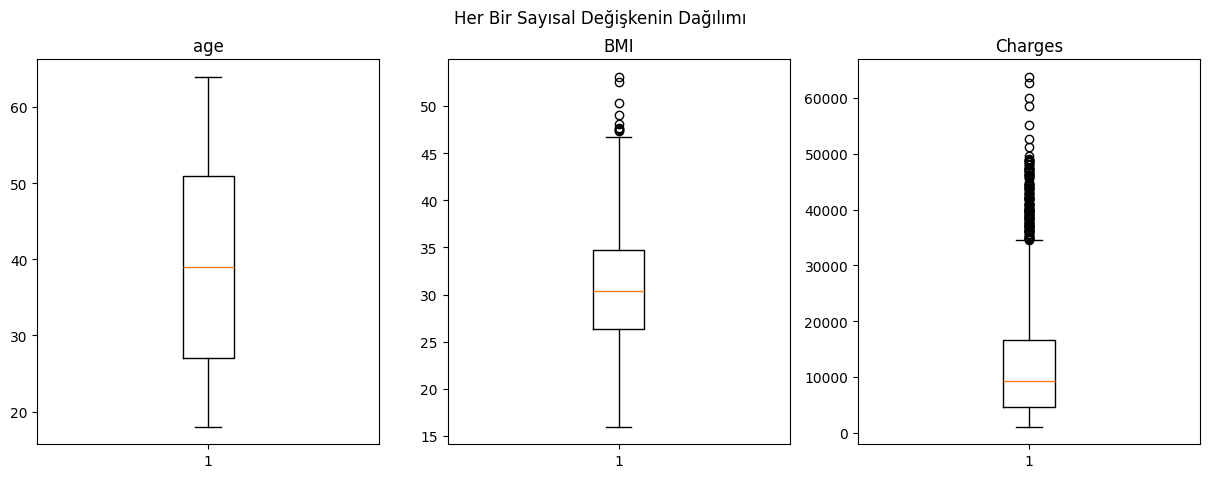

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
# Verimizi g√∂rselle≈ütirmek i√ßin bir fig√ºr olu≈üturur ve 1 satƒ±r, 3 s√ºtundan olu≈üan bir grid yapƒ±sƒ± ekler.
axs[0].boxplot(df["age"])
# ƒ∞lk eksende (axs[0]) 'age' (ya≈ü) s√ºtununun kutu grafiƒüini √ßizer.
axs[0].title.set_text("age")
# ƒ∞lk eksenin ba≈ülƒ±ƒüƒ±nƒ± "age" (ya≈ü) olarak ayarlar.
axs[1].boxplot(df["bmi"])
# ƒ∞kinci eksende (axs[1]) 'bmi' s√ºtununun kutu grafiƒüini √ßizer.
axs[1].title.set_text("BMI")
# ƒ∞kinci eksenin ba≈ülƒ±ƒüƒ±nƒ± "BMI" olarak ayarlar.
axs[2].boxplot(df["charges"])
# √ú√ß√ºnc√º eksende (axs[2]) 'charges' s√ºtununun kutu grafiƒüini √ßizer.
axs[2].title.set_text("Charges")
# √ú√ß√ºnc√º eksenin ba≈ülƒ±ƒüƒ±nƒ± "Charges" olarak ayarlar.
plt.suptitle("Her Bir Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±")
# T√ºm fig√ºr√ºn genel ba≈ülƒ±ƒüƒ±nƒ± "Her Bir Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±" olarak ayarlar.


In [ ]:
#kategorik.

df[["sex","smoker","region"]].value_counts()
# Veri k√ºmesindeki "sex", "smoker" i√ßen" ve "region"nin benzersiz kombinasyonlarƒ±nƒ±n sayƒ±sƒ±nƒ± g√∂r√ºnt√ºleyin.

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
Name: count, dtype: int64

Text(0.5, 0.98, 'Her Bir Kategorik Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±')

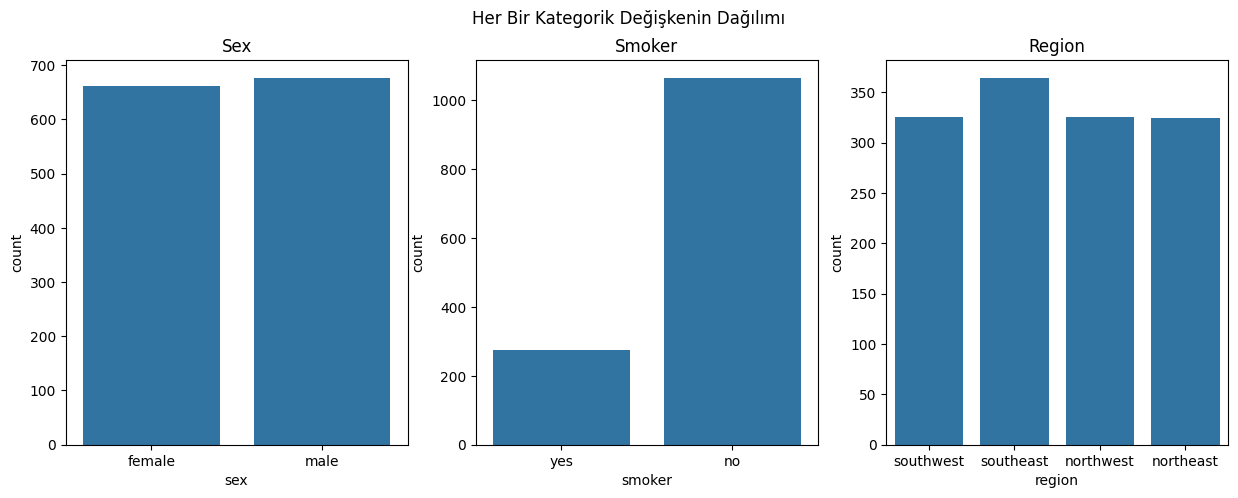

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
# Verimizi g√∂rselle≈ütirmek i√ßin bir fig√ºr olu≈üturur ve 1 satƒ±r, 3 s√ºtundan olu≈üan bir grid yapƒ±sƒ± ekler.
sns.countplot(ax=axs[0], data=df, x="sex")
# ƒ∞lk eksende (axs[0]) 'sex' (cinsiyet) s√ºtununun s√ºtun grafiƒüini √ßizer. Her kategori i√ßin frekans g√∂sterir.
axs[0].title.set_text("Sex")
# ƒ∞lk eksenin ba≈ülƒ±ƒüƒ±nƒ± "Sex" (Cinsiyet) olarak ayarlar.
sns.countplot(ax=axs[1], data=df, x="smoker")
# ƒ∞kinci eksende (axs[1]) 'smoker' (sigara i√ßme durumu) s√ºtununun s√ºtun grafiƒüini √ßizer. Her kategori i√ßin frekans g√∂sterir.
axs[1].title.set_text("Smoker")
# ƒ∞kinci eksenin ba≈ülƒ±ƒüƒ±nƒ± "Smoker" (Sigara ƒ∞√ßen) olarak ayarlar.
sns.countplot(ax=axs[2], data=df, x="region")
# √ú√ß√ºnc√º eksende (axs[2]) 'region' (b√∂lge) s√ºtununun s√ºtun grafiƒüini √ßizer. Her kategori i√ßin frekans g√∂sterir.
axs[2].title.set_text("Region")
# √ú√ß√ºnc√º eksenin ba≈ülƒ±ƒüƒ±nƒ± "Region" (B√∂lge) olarak ayarlar.
plt.suptitle("Her Bir Kategorik Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±")
# T√ºm fig√ºr√ºn genel ba≈ülƒ±ƒüƒ±nƒ± "Her Bir Kategorik Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±" olarak ayarlar.


Veri daƒüƒ±lƒ±mƒ± cinsiyet ve b√∂lge arasƒ±nda nispeten dengelidir. Sigara i√ßenler ile sigara i√ßmeyenler arasƒ±nda belirgin bir dengesizlik vardƒ±r ve bu √∂zellik √ßalƒ±≈ümada √∂nemli bir √∂neme sahipse analizi etkileyebilir.


# **3.ƒ∞ki Deƒüi≈ükenli Analiz**


In [ ]:
df["age"].corr(df["charges"])## "Ya≈ü" ve "y√ºkler" arasƒ±ndaki korelasyon katsayƒ±sƒ±nƒ± hesapla

0.29900819333064754

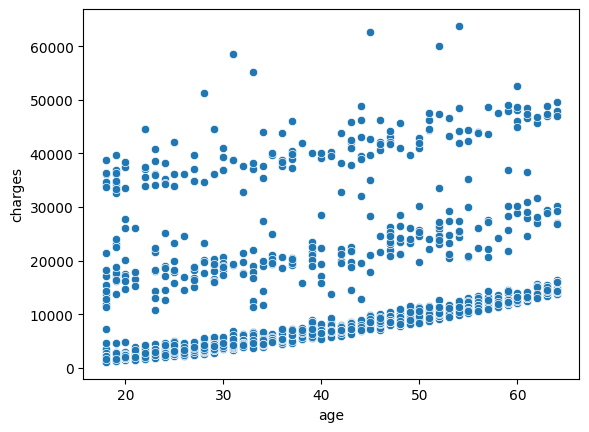

In [ ]:
sns.scatterplot(x="age", y="charges", data=df);
# "age" ve "carges" arasƒ±ndaki ili≈ükiyi g√∂rselle≈ütirmek i√ßin bir daƒüƒ±lƒ±m grafiƒüi olu≈üturun.

"Ya≈ü" ile "√ºcretler" arasƒ±ndaki korelasyon katsayƒ±sƒ± yakla≈üƒ±k 0,299'dur; bu da zayƒ±f pozitif doƒürusal bir ili≈ükiye i≈üaret etmektedir.

Daƒüƒ±lƒ±m grafiƒüinden:
Trend: Ya≈ü arttƒ±k√ßa √ºcretlerde hafif bir artƒ±≈ü eƒüilimi g√∂r√ºl√ºyor; bu da ya≈ülƒ± bireylerin ortalama olarak daha y√ºksek √ºcretler √∂deme eƒüiliminde olduƒüunu g√∂steriyor.

Yayƒ±lma: Her ya≈ü grubunda √ºcretlerde √∂nemli farklƒ±lƒ±klar vardƒ±r; bazƒ± ki≈üiler ya≈ütan baƒüƒ±msƒ±z olarak √ßok y√ºksek √ºcretler √∂der.

K√ºmeler: Muhtemelen diƒüer fakt√∂rlerden (√∂rneƒüin sigara i√ßme durumu, BMI veya bakmakla y√ºk√ºml√º olunan ki≈üilerin olmasƒ±) etkilenen belirgin k√ºmeler var gibi g√∂r√ºn√ºyor.


In [ ]:
df["bmi"].corr(df["charges"]) ## "BMI" ve "charges" arasƒ±ndaki korelasyon katsayƒ±sƒ±nƒ± hesaplayƒ±n ve d√∂nd√ºr√ºn.

0.19834096883362895

"Bmi" ile "charges" arasƒ±ndaki korelasyon katsayƒ±sƒ± yakla≈üƒ±k 0,198'dir ve bu zayƒ±f pozitif doƒürusal bir ili≈ükiyi g√∂sterir.


In [ ]:
df.groupby("region")["charges"].sum() #"Region" s√ºtununa g√∂re verileri gruplandƒ±rarak her bir "region" i√ßin toplam "charges" deƒüerini hesaplayƒ±n.

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

B√∂lgeler arasƒ±nda tƒ±bbi masraflarda √∂nemli bir fark yok, sadece G√ºneydoƒüu'da diƒüer b√∂lgelere g√∂re yakla≈üƒ±k y√ºzde 25'lik bir artƒ±≈ü var.


# **4.√áok Deƒüi≈ükenli Analiz:**

In [ ]:
# Kategorik verileri Sayƒ±sal verilere d√∂n√º≈üt√ºrme
encoded_data = pd.get_dummies(df, columns=["sex", "smoker", "region"],drop_first=True)
#drop_first=True arg√ºmanƒ±, ilk kategorinin d√º≈ü√ºr√ºlmesi gerektiƒüini belirtmek i√ßin get_dummies()'e ge√ßirilir

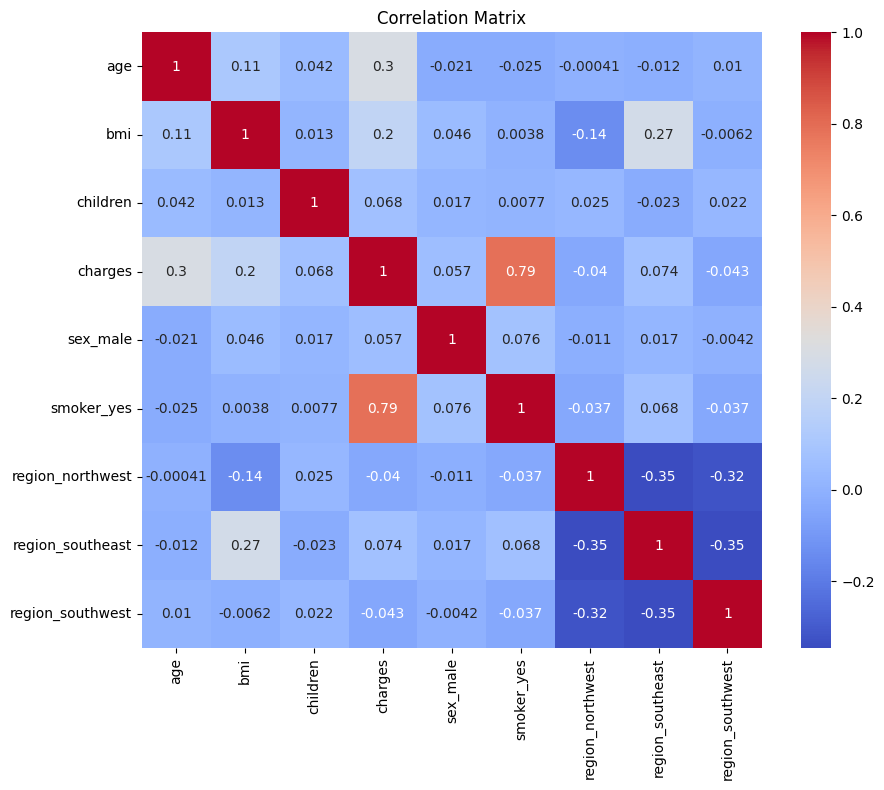

In [ ]:
## korelasyon matrisini hesapla
correlation_matrix = encoded_data.corr()

#G√∂rselle≈ütirme korelasyon matrisi ƒ±sƒ± haritasƒ±na g√∂re
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Sigara i√ßen evet (sigara i√ßen) ile arasƒ±ndaki korelasyon y√ºksektir = 0,79, bu nedenle √ºcretleri etkileyebilir

# **5.LinearRegression **

In [ ]:
from sklearn.linear_model import LinearRegression # sklearn k√ºt√ºphanesinden Linear Regression modelini i√ße aktar
from sklearn.model_selection import train_test_split # Veriyi eƒüitim ve test olarak ayƒ±rmak i√ßin train_test_split metodunu i√ße aktar

X = encoded_data.drop("charges", axis=1)
# X = "charges" s√ºtunu hari√ß t√ºm veri seti (baƒüƒ±msƒ±z deƒüi≈ükenler)

y = encoded_data["charges"]
# y (baƒüƒ±mlƒ± deƒüi≈üken) = "charges" s√ºtunu
#Baƒüƒ±mlƒ± deƒüi≈üekn olarak belirle.

# Veriyi %80 eƒüitim, %20 test olacak ≈üekilde ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random_state=42: Sonu√ßlarƒ±n tekrarlanabilir olmasƒ± i√ßin sabit bir rastgelelik ayarƒ±dƒ±r.

model = LinearRegression()
# Lineer Regresyon modelini olu≈ütur

model.fit(X_train, y_train)
# Modeli eƒüitim verisi ile eƒüit

# Bir DataFrame olu≈ütur. Bu DataFrame, baƒüƒ±msƒ±z deƒüi≈ükenlerin (X.columns) ve model tarafƒ±ndan hesaplanan
# kar≈üƒ±lƒ±k gelen katsayƒ±larƒ±nƒ± (model.coef_) i√ßerir.
# √ñzellik adlarƒ± indeks olarak kullanƒ±lƒ±r ve katsayƒ±lar "Coefficient" adlƒ± bir s√ºtunda saklanƒ±r.

coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
# Katsayƒ±larƒ± i√ßeren DataFrame'i ekrana yazdƒ±r


                   Coefficient
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


smoker_yes (23651.128856) katsayƒ±sƒ±, modeldeki t√ºm √∂zellikler arasƒ±nda b√ºy√ºkl√ºk a√ßƒ±sƒ±ndan en b√ºy√ºƒü√ºd√ºr. Bu, sigara i√ßen birinin √∂ng√∂r√ºlen sigorta √ºcretleri √ºzerinde √ßok √∂nemli bir pozitif etkiye sahip olduƒüunu g√∂sterir.

≈ûimdi 2 deƒüi≈üken arasƒ±ndaki etkile≈üimi hesaplamak i√ßin yeni s√ºtunlar olu≈üturalƒ±m.

**Hedef deƒüi≈üken ("charges") √ºzerinde √ßalƒ±≈üarak Lineer Regresyon modelini olu≈üturma.**

In [ ]:
encoded_data["smoker_sex_interaction"] = encoded_data["smoker_yes"] * encoded_data["sex_male"]
# Sigara i√ßme durumu ve cinsiyet arasƒ±nda bir etkile≈üim terimi olu≈üturulur.

encoded_data["smoker_age_interaction"] = encoded_data["smoker_yes"] * encoded_data["age"]
# Sigara i√ßme durumu ve ya≈ü arasƒ±nda bir etkile≈üim terimi olu≈üturulur.

encoded_data["bmi_age_interaction"] = encoded_data["bmi"] * encoded_data["age"]
# BMI (v√ºcut kitle indeksi) ve ya≈ü arasƒ±nda bir etkile≈üim terimi olu≈üturulur.

X = encoded_data.drop("charges", axis=1)
# X, "charges" s√ºtunu hari√ß t√ºm veri seti olarak tanƒ±mlanƒ±r (baƒüƒ±msƒ±z deƒüi≈ükenler).

y = encoded_data["charges"]
# y, "charges" s√ºtunu olarak tanƒ±mlanƒ±r (baƒüƒ±mlƒ± deƒüi≈üken).

# Veriyi %80 eƒüitim, %20 test olacak ≈üekilde ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
# Lineer Regresyon modelini olu≈ütur

model.fit(X_train, y_train)
# Modeli eƒüitim verisi ile eƒüit

# Bir DataFrame olu≈ütur. Bu DataFrame, baƒüƒ±msƒ±z deƒüi≈ükenlerin (X.columns) ve model tarafƒ±ndan hesaplanan
# kar≈üƒ±lƒ±k gelen katsayƒ±larƒ±nƒ± (model.coef_) i√ßerir.
# √ñzellik adlarƒ± indeks olarak kullanƒ±lƒ±r ve katsayƒ±lar "Coefficient" adlƒ± bir s√ºtunda saklanƒ±r.

#Bu satƒ±r, lineer regresyon modelinin hesapladƒ±ƒüƒ± katsayƒ±larƒ± ve deƒüi≈üken isimlerini bir tablo (DataFrame) halinde saklar.
#Sonu√ß: Her deƒüi≈ükenin hedef deƒüi≈üken (y) √ºzerindeki etkisini g√∂sterir. Pozitif katsayƒ±lar pozitif etkiyi, negatif katsayƒ±lar negatif etkiyi ifade eder.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
# Katsayƒ±larƒ± i√ßeren DataFrame'i ekrana yazdƒ±r


                         Coefficient
age                       279.057638
bmi                       374.560304
children                  400.923281
sex_male                 -525.077253
smoker_yes              20154.918523
region_northwest         -358.025494
region_southeast         -687.566710
region_southwest         -791.363271
smoker_sex_interaction   2499.059064
smoker_age_interaction     54.460131
bmi_age_interaction        -1.084708


In [ ]:
# Model deƒüerlendirme metriklerini i√ße aktar
from sklearn.metrics import r2_score, mean_squared_error

# Test seti i√ßin tahmin edilen hedef deƒüerleri hesapla
y_pred = model.predict(X_test)

# R-kare (a√ßƒ±klanan varyans oranƒ±) ve MSE (ortalama karesel hata) deƒüerlerini hesapla
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R-kare deƒüerini (1'e ne kadar yakƒ±nsa o kadar iyi) ve MSE'yi (ne kadar d√º≈ü√ºkse o kadar iyi) ekrana yazdƒ±r
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.7827153528964075
Mean Squared Error: 33733165.83547039


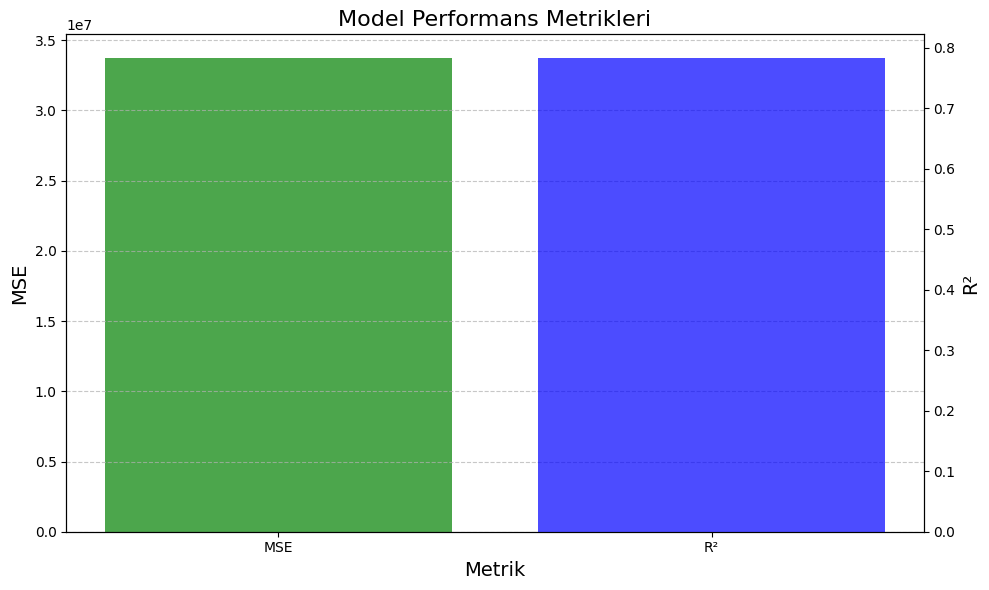

In [ ]:
import matplotlib.pyplot as plt

# R¬≤ ve MSE deƒüerlerini bir s√∂zl√ºkte sakla
metrics = {"R¬≤": r2, "MSE": mse}

# Grafik olu≈ütur
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", mse, color='green', alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metrik", fontsize=14)
ax1.set_title("Model Performans Metrikleri", fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", r2, color='blue', alpha=0.7, label="R¬≤")
ax2.set_ylabel("R¬≤", fontsize=14)
ax2.tick_params(axis='y')

# Grafik g√∂sterimi
fig.tight_layout()
plt.show()


R¬≤ (R-squared): Modelin A√ßƒ±klayƒ±cƒ±lƒ±k G√ºc√º

Grafikte g√∂r√ºlen: R¬≤ deƒüeri, [0, 1] arasƒ±nda bir deƒüerdir ve burada yakla≈üƒ±k 0.78 (veya %78) olarak hesaplanmƒ±≈ütƒ±r.

Anlamƒ±: R¬≤, baƒüƒ±msƒ±z deƒüi≈ükenlerin (√∂zelliklerin) hedef deƒüi≈üken √ºzerindeki varyansƒ± ne kadar a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir.

%78 a√ßƒ±klama g√ºc√º, modelin hedef deƒüi≈ükenin (charges) varyansƒ±nƒ±n b√ºy√ºk bir kƒ±smƒ±nƒ± baƒüƒ±msƒ±z deƒüi≈ükenler kullanarak a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂steriyor.

Ancak, %22'lik bir kƒ±sƒ±m a√ßƒ±klanamamƒ±≈ü durumda, bu da modelin m√ºkemmel olmadƒ±ƒüƒ±nƒ± ve geli≈ütirme potansiyeli olduƒüunu g√∂sterir.
Olumlu Yorum:

R¬≤'nin bu kadar y√ºksek olmasƒ±, se√ßtiƒüiniz deƒüi≈ükenlerin (ya≈ü, BMI, sigara kullanƒ±mƒ± vb.) charges √ºzerinde olduk√ßa etkili olduƒüunu g√∂steriyor.
Geli≈ütirme Alanƒ±:

%22 a√ßƒ±klanamayan kƒ±smƒ± azaltmak i√ßin ba≈üka deƒüi≈ükenler eklenebilir veya etkile≈üim terimleri daha detaylƒ± incelenebilir.

MSE (Mean Squared Error): Hata B√ºy√ºkl√ºƒü√º

Grafikte g√∂r√ºlen: MSE deƒüeri olduk√ßa y√ºksek, 33,733,165 olarak hesaplanmƒ±≈ütƒ±r.

Anlamƒ±: MSE, modelin tahmin ettiƒüi deƒüerler ile ger√ßek deƒüerler arasƒ±ndaki farkƒ±n karesel ortalamasƒ±nƒ± temsil eder.

Bu metrik, modelin ne kadar b√ºy√ºk hatalar yaptƒ±ƒüƒ±nƒ± sayƒ±sal olarak ifade eder.

Y√ºksek bir MSE deƒüeri, tahmin edilen deƒüerlerin ger√ßek deƒüerlerden b√ºy√ºk √∂l√ß√ºde sapabileceƒüini g√∂sterir.

Olumsuz Yorum:

MSE'nin y√ºksekliƒüi, modelin tahminlerinde hata oranƒ±nƒ±n olduk√ßa y√ºksek olabileceƒüini g√∂steriyor.

Geli≈ütirme Alanƒ±:

MSE'yi azaltmak i√ßin:

Modelin karma≈üƒ±klƒ±ƒüƒ± artƒ±rƒ±labilir (√∂rneƒüin, polinom regresyon veya non-lineer modeller).

Daha fazla anlamlƒ± deƒüi≈üken eklenebilir.

Outlier'larƒ± (a≈üƒ±rƒ± u√ß noktalar) temizlemek i√ßin veri analizi yapƒ±labilir.

Genel Deƒüerlendirme
Modelin g√º√ßl√º y√∂nleri:

R¬≤'nin %78 olmasƒ±, baƒüƒ±msƒ±z deƒüi≈ükenlerin g√º√ßl√º bir ≈üekilde hedef deƒüi≈ükeni a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂steriyor.
Sigara kullanƒ±mƒ±, ya≈ü, BMI gibi deƒüi≈ükenlerin etkili olduƒüu sonucuna ula≈üƒ±yoruz.
Modelin zayƒ±f y√∂nleri:

MSE'nin y√ºksek olmasƒ±, modelin bazƒ± verilerde b√ºy√ºk hatalar yaptƒ±ƒüƒ±nƒ± g√∂steriyor.
Bu hata, √∂zellikle deƒüi≈ükenlerin bazƒ± gruplar i√ßin daha farklƒ± etkiler g√∂stermesi veya outlier'larƒ±n modelde yer almasƒ±yla ili≈ükili olabilir.

# **----------------------------**

0,7827'lik R kare deƒüeri, modelin hedef deƒüi≈ükendeki varyansƒ±n yakla≈üƒ±k %78,27'sini a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir.
MSE y√ºksektir, bu nedenle bunu Rastgele Orman Regresyon modeliyle azaltmaya √ßalƒ±≈üacaƒüƒ±z


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# sklearn k√ºt√ºphanesinden Random Forest modelini i√ße aktar

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# 100 aƒüa√ß (tree) ile bir Random Forest modeli olu≈ütur.
# random_state=42 ile modelin her √ßalƒ±≈ütƒ±rƒ±ldƒ±ƒüƒ±nda aynƒ± sonucu √ºretmesi saƒülanƒ±r.

rf_model.fit(X_train, y_train)
# Modeli eƒüitim verisi (X_train ve y_train) ile eƒüit


RandomForestRegressor(random_state=42)

In [ ]:
# Model Prediction
y_pred = rf_model.predict(X_test)

# R-squared and Mean Squared Error Calculation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.8651038544775356
Mean Squared Error: 20942455.47549228


            √ñzellik     √ñnemi
4        smoker_yes  0.608618
1               bmi  0.216478
0               age  0.134232
2          children  0.019413
3          sex_male  0.006379
5  region_northwest  0.005587
6  region_southeast  0.005343
7  region_southwest  0.003950


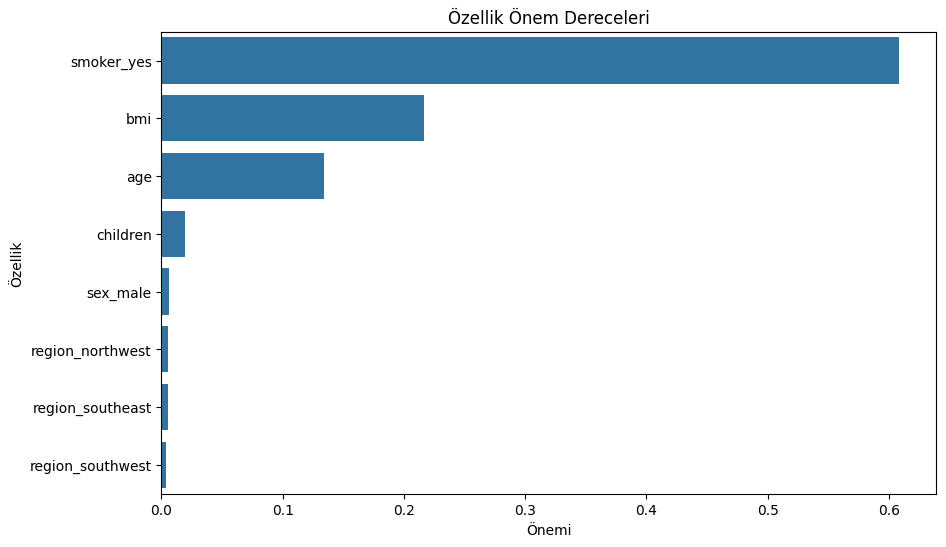

In [ ]:
# Eƒüitilmi≈ü Random Forest modelinden √∂zellik √∂nem derecelerini √ßƒ±kar
feature_importances = rf_model.feature_importances_

# Veri √ßer√ßevesinden √∂zellik isimlerini al
features = X.columns

# √ñzellik isimleri ve √∂nem derecelerini saklamak i√ßin bir veri √ßer√ßevesi olu≈ütur
importance_df = pd.DataFrame({"√ñzellik": features, "√ñnemi": feature_importances})

# √ñzellik √∂nem derecelerine g√∂re veri √ßer√ßevesini azalan sƒ±ralama ile sƒ±rala
importance_df = importance_df.sort_values(by="√ñnemi", ascending=False)

# √ñzellik √∂nem derecelerini g√∂steren sƒ±ralƒ± veri √ßer√ßevesini yazdƒ±r
print(importance_df)

# √ñzellik √∂nem derecelerini √ßubuk grafik ile g√∂rselle≈ütir
plt.figure(figsize=(10, 6))
sns.barplot(x="√ñnemi", y="√ñzellik", data=importance_df)  # T√ºrk√ßele≈ütirilmi≈ü s√ºtun isimleriyle uyumlu hale getirildi
plt.title("√ñzellik √ñnem Dereceleri")
plt.show()



**ƒ∞statistiksel Veriler.**

In [ ]:
# "charges" s√ºtunu i√ßin tanƒ±mlayƒ±cƒ± istatistikleri olu≈ütur (sayƒ±, ortalama, standart sapma, minimum, %25, %50, %75 ve maksimum deƒüerler)
df["charges"].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

"cinsiyet" s√ºtunundaki veriler dengeliyken kadƒ±n = 662 ve erkek = 676 In


In [ ]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

"sigara i√ßen" s√ºtunundaki veriler dengelidir, sigara i√ßen = 274 ve sigara i√ßmeyen = 1064


In [ ]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# *b√∂lgedeki veriler dengeli*

# **G√∂rselle≈ütirme**

Text(0.5, 0.98, 'Her Bir Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±')

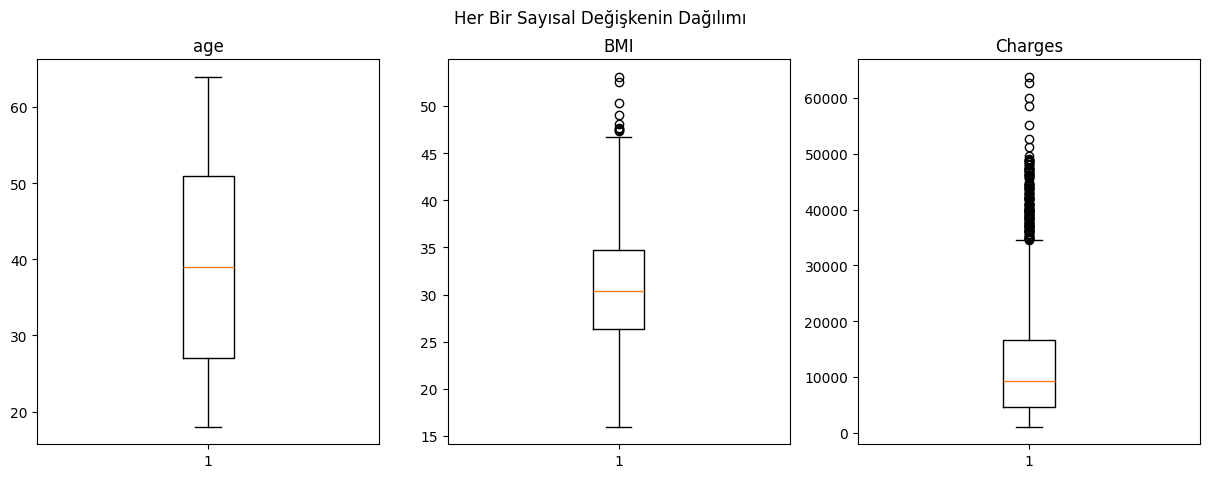

In [ ]:
# Verimizi g√∂rselle≈ütirmek i√ßin bir Figure olu≈ütur ve 1 satƒ±r, 3 s√ºtunlu bir eksen ƒ±zgarasƒ± ekle
fig, axs = plt.subplots(1,3,figsize=(15,5))

# ƒ∞lk alt grafikte "age" (ya≈ü) s√ºtunu i√ßin kutu grafiƒüi √ßiz
axs[0].boxplot(df["age"])
# ƒ∞lk alt grafiƒüin ba≈ülƒ±ƒüƒ±nƒ± "age" (ya≈ü) olarak ayarla
axs[0].title.set_text("age")

# ƒ∞kinci alt grafikte "bmi" s√ºtunu i√ßin kutu grafiƒüi √ßiz
axs[1].boxplot(df["bmi"])
# ƒ∞kinci alt grafiƒüin ba≈ülƒ±ƒüƒ±nƒ± "BMI" olarak ayarla
axs[1].title.set_text("BMI")

# √ú√ß√ºnc√º alt grafikte "charges" (√ºcretler) s√ºtunu i√ßin kutu grafiƒüi √ßiz
axs[2].boxplot(df["charges"])
# √ú√ß√ºnc√º alt grafiƒüin ba≈ülƒ±ƒüƒ±nƒ± "Charges" olarak ayarla
axs[2].title.set_text("Charges")

# Grafiƒüin genel ba≈ülƒ±ƒüƒ±nƒ± ayarla
plt.suptitle("Her Bir Sayƒ±sal Deƒüi≈ükenin Daƒüƒ±lƒ±mƒ±")


<Axes: xlabel='sex', ylabel='count'>

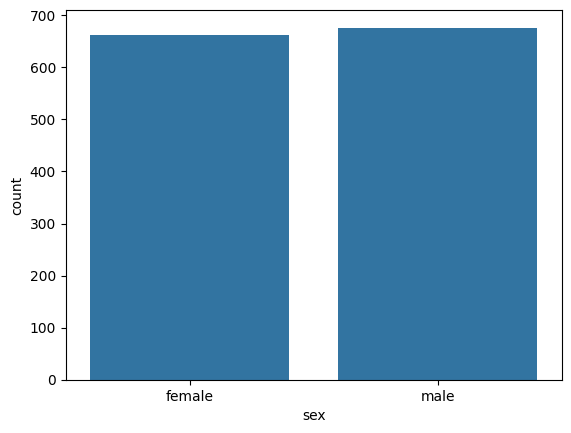

In [ ]:
# "sex" s√ºtunu i√ßin kategorilerin sƒ±klƒ±ƒüƒ±nƒ± g√∂steren bir sayƒ±m grafiƒüi olu≈ütur
sns.countplot(data=df, x="sex")


<Axes: xlabel='smoker', ylabel='count'>

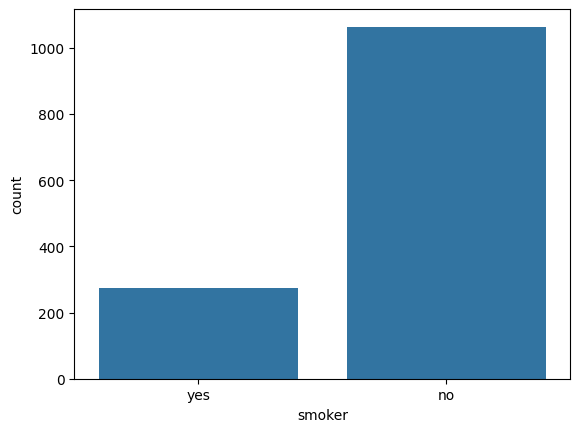

In [ ]:
# "smoker" s√ºtunu i√ßin kategorilerin sƒ±klƒ±ƒüƒ±nƒ± g√∂steren bir sayƒ±m grafiƒüi olu≈ütur
sns.countplot(data=df, x="smoker")


<Axes: xlabel='region', ylabel='count'>

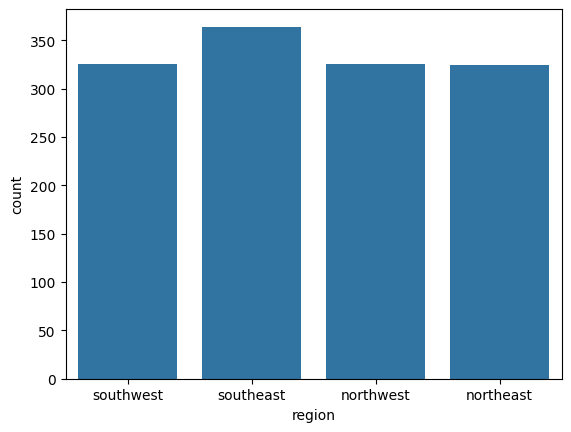

In [ ]:
# "region" s√ºtunu i√ßin kategorilerin sƒ±klƒ±ƒüƒ±nƒ± g√∂steren bir sayƒ±m grafiƒüi olu≈ütur
sns.countplot(data=df, x="region")


In [ ]:
# Yalnƒ±zca sayƒ±sal s√ºtunlarƒ± i√ßeren bir veri √ßer√ßevesi olu≈ütur: "age", "bmi" ve "charges"
numerical_data = df[["age", "bmi", "charges"]]


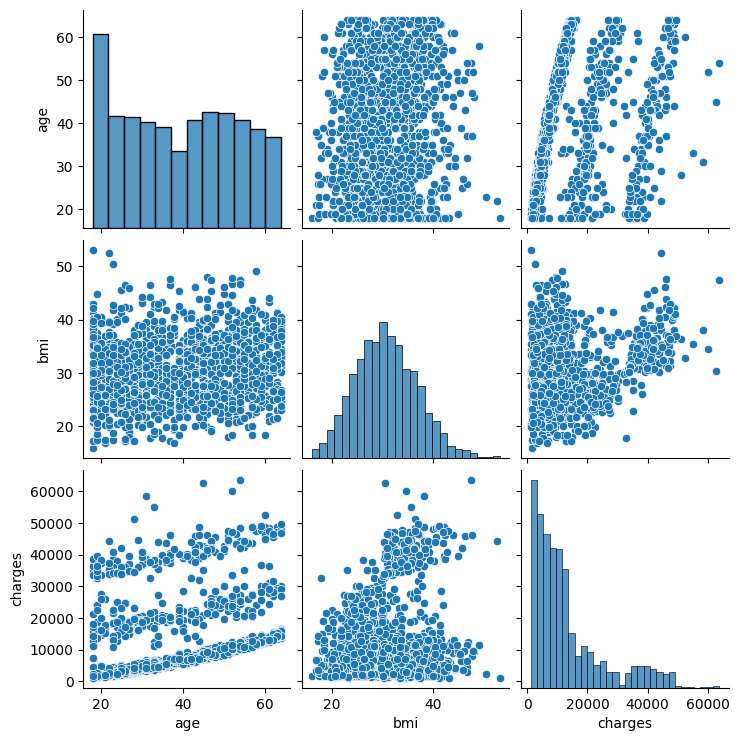

In [ ]:
# Sayƒ±sal s√ºtunlar olan "age", "bmi" ve "charges" arasƒ±ndaki ikili ili≈ükileri g√∂rselle≈ütirmek i√ßin √ßift deƒüi≈ükenli (pairplot) grafik olu≈üturur.
sns.pairplot(numerical_data)


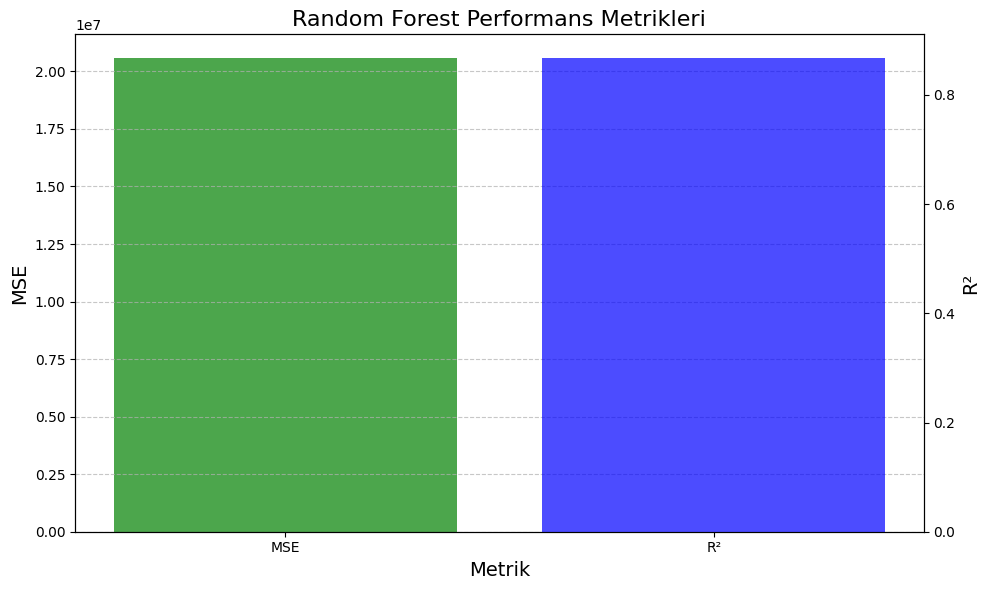

In [ ]:
import matplotlib.pyplot as plt

# Yeni R¬≤ ve MSE deƒüerlerini bir s√∂zl√ºkte sakla
metrics = {"R¬≤": 0.8674256406719348, "MSE": 20582001.114016682}

# Grafik olu≈ütur
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", metrics["MSE"], color='green', alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metrik", fontsize=14)
ax1.set_title("Random Forest Performans Metrikleri", fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", metrics["R¬≤"], color='blue', alpha=0.7, label="R¬≤")
ax2.set_ylabel("R¬≤", fontsize=14)
ax2.tick_params(axis='y')

# Grafik g√∂sterimi
fig.tight_layout()
plt.show()


# **Grafik Analizi**


R¬≤ (Saƒü eksen):

R¬≤ deƒüeri 0.867 olarak hesaplanmƒ±≈ü. Bu, Random Forest modelinin hedef deƒüi≈ükenin (charges) varyansƒ±nƒ±n yakla≈üƒ±k %87'sini a√ßƒ±klayabildiƒüini g√∂steriyor.
Bu deƒüer, modelin y√ºksek bir a√ßƒ±klama g√ºc√ºne sahip olduƒüunu ve olduk√ßa iyi bir performans sergilediƒüini ifade eder.
MSE (Sol eksen):

MSE deƒüeri 20,582,001 olarak hesaplanmƒ±≈ü. Bu, tahmin edilen deƒüerler ile ger√ßek deƒüerler arasƒ±ndaki hata b√ºy√ºkl√ºƒü√ºn√ºn olduk√ßa d√º≈ü√ºk bir seviyeye √ßekildiƒüini g√∂steriyor (daha √∂nceki lineer regresyon modeline kƒ±yasla daha iyi).

Random Forest Modelinin G√º√ßl√º Y√∂nleri

R¬≤ deƒüeri olduk√ßa y√ºksek olduƒüundan, model veriyi √ßok iyi a√ßƒ±klƒ±yor.
Lineer Regresyon modeline kƒ±yasla daha d√º≈ü√ºk bir MSE'ye sahip, yani hata oranƒ± azalmƒ±≈ü durumda.

Random Forest, non-lineer ili≈ükileri yakalamada ba≈üarƒ±lƒ± olduƒüu i√ßin performansƒ±n artmasƒ± beklenen bir sonu√ßtur.

**Kar≈üƒ±la≈ütƒ±rma: Lineer Regresyon vs Random Forest**

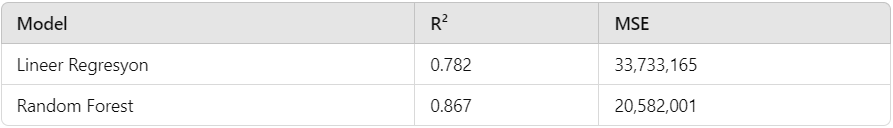


Random Forest, hem R¬≤'de bir artƒ±≈ü hem de MSE'de bir d√º≈ü√º≈ü saƒülamƒ±≈ütƒ±r.

Bu da Random Forest'ƒ±n Lineer Regresyon modeline kƒ±yasla daha iyi bir performans sunduƒüunu g√∂stermektedir.

# **------≈ûimdi ise daha optimize edilmi≈ü bir random forest ile deneyelim.**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Hiperparametre arama i√ßin parametre ƒ±zgarasƒ±
param_grid = {
    'n_estimators': [50, 100, 200],  # Aƒüa√ß sayƒ±sƒ±
    'max_depth': [10, 20, 30, None],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Bir d√ºƒü√ºmde b√∂l√ºnmeden √∂nceki minimum √∂rnek sayƒ±sƒ±
    'min_samples_leaf': [1, 2, 4]  # Yaprak d√ºƒü√ºmdeki minimum √∂rnek sayƒ±sƒ±
}
#Hiperparametre aralƒ±ƒüƒ±nƒ± tanƒ±mlar (aƒüa√ß sayƒ±sƒ±, maksimum derinlik vb.).

# Grid Search CV ile en iyi parametreleri bul
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3 katlƒ± √ßapraz doƒürulama
                           #3 katlƒ± √ßapraz doƒürulama yapar. Veri seti 3 par√ßaya b√∂l√ºn√ºr, her seferinde 2 par√ßa eƒüitim, 1 par√ßa test i√ßin kullanƒ±lƒ±r.
                           n_jobs=-1,  # Paralel i≈ülem
                           #: Paralel i≈ülem yaparak t√ºm i≈ülemci √ßekirdeklerini kullanƒ±r. Hesaplamayƒ± hƒ±zlandƒ±rƒ±r.
                           verbose=2)
                            # √áƒ±ktƒ±yƒ± daha detaylƒ± g√∂sterir. Hangi parametre kombinasyonunun denendiƒüini g√∂rmek i√ßin kullanƒ±lƒ±r
#Belirtilen hiperparametre kombinasyonlarƒ±nƒ± √ßapraz doƒürulama (cv=3) ile dener ve en iyisini bulur.

# Modeli eƒüitim verisi ile optimize et
grid_search.fit(X_train, y_train)

# En iyi parametreler ile yeni Random Forest modeli olu≈ütur
best_params = grid_search.best_params_
optimized_rf_model = RandomForestRegressor(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)

# Test verisi i√ßin tahminler
y_pred_optimized = optimized_rf_model.predict(X_test)

# Performans deƒüerlendirme
r2_optimized = r2_score(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Sonu√ßlarƒ± yazdƒ±r
print("En ƒ∞yi Parametreler:", best_params)
print(f"R-squared (Optimize Edilmi≈ü): {r2_optimized}")
print(f"Mean Squared Error (Optimize Edilmi≈ü): {mse_optimized}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
En ƒ∞yi Parametreler: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R-squared (Optimize Edilmi≈ü): 0.8767096947516304
Mean Squared Error (Optimize Edilmi≈ü): 19140663.495042916


Bu Kod Ne Yapƒ±yor?

Parametre Arama: Grid Search kullanarak n_estimators, max_depth,
min_samples_split, ve min_samples_leaf parametrelerini optimize ediyor.

En ƒ∞yi Parametreler: grid_search.best_params_ ile en iyi kombinasyonu se√ßiyor.

Yeni Model: Optimize edilmi≈ü parametrelerle yeni bir Random Forest modeli olu≈üturup eƒüitiyor.

Performans Deƒüerlendirme: Test verisi √ºzerinde R¬≤ ve MSE hesaplanƒ±yor.

-------Performans √∂l√ß√ºtlerini grafikten inceleyelim.


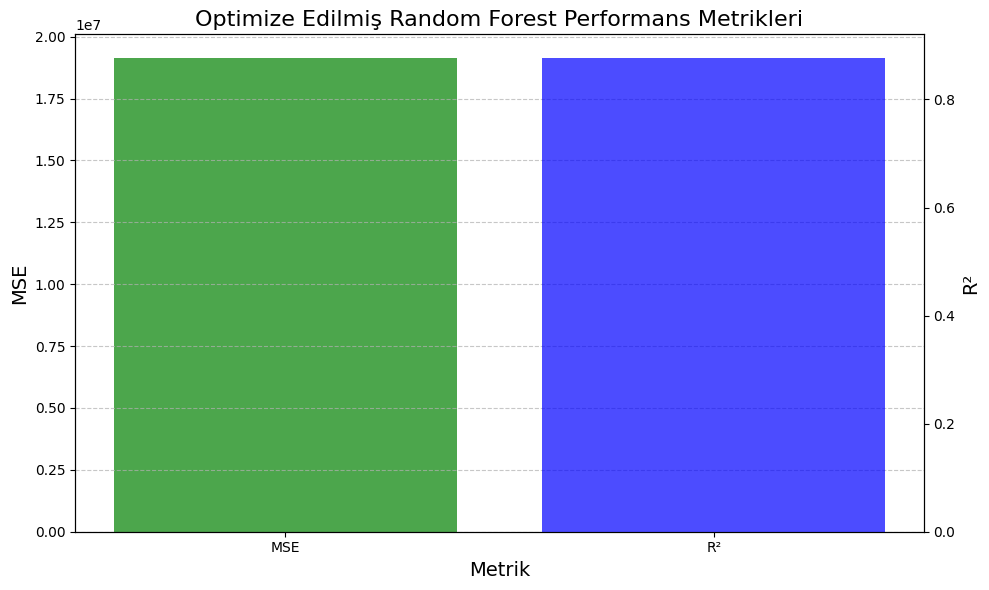

In [ ]:
import matplotlib.pyplot as plt

# Optimize edilmi≈ü R¬≤ ve MSE deƒüerlerini bir s√∂zl√ºkte sakla
optimized_metrics = {"R¬≤": 0.8767096947516304, "MSE": 19140663.495042916}

# Grafik olu≈ütur
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", optimized_metrics["MSE"], color='green', alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metrik", fontsize=14)
ax1.set_title("Optimize Edilmi≈ü Random Forest Performans Metrikleri", fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", optimized_metrics["R¬≤"], color='blue', alpha=0.7, label="R¬≤")
ax2.set_ylabel("R¬≤", fontsize=14)
ax2.tick_params(axis='y')

# Grafik g√∂sterimi
fig.tight_layout()
plt.show()



Grafik Analizi:
R¬≤ (mavi √ßubuk, saƒü eksen):

Deƒüer: 0.8767

Optimize edilen modelin hedef deƒüi≈ükenin (charges) varyansƒ±nƒ±n yakla≈üƒ±k %87.7'sini a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir.
√ñnceki modelin 0.867 olan R¬≤ deƒüerine g√∂re artƒ±≈ü g√∂stermi≈ütir.
MSE (ye≈üil √ßubuk, sol eksen):

Deƒüer: 19,140,663

Hata oranƒ± √∂nceki 20,582,001 deƒüerine kƒ±yasla d√º≈üm√º≈üt√ºr. Daha d√º≈ü√ºk MSE daha iyi bir model performansƒ±nƒ± g√∂sterir.

Sonu√ß:

Optimizasyon sayesinde hem R¬≤ deƒüeri artmƒ±≈ü hem de MSE deƒüeri azalmƒ±≈ütƒ±r.

Model daha iyi genelleme yapmaktadƒ±r ve daha g√ºvenilir tahminler √ºretmektedir.

# **Bir ka√ß istitastik ekleyelim.**

**√ñzellik √ñnem Skorlarƒ± (Feature Importance)**

Hangi deƒüi≈ükenlerin modele daha fazla katkƒ± saƒüladƒ±ƒüƒ±nƒ± g√∂sterir.


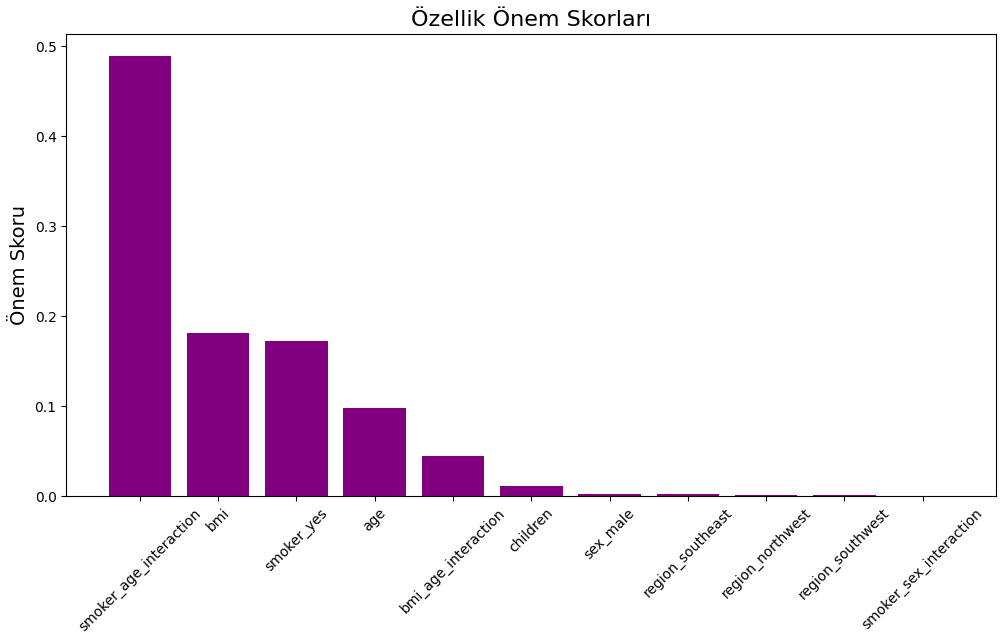

In [ ]:
# √ñzellik √∂nem skorlarƒ±nƒ± hesapla ve g√∂rselle≈ütir
feature_importances = optimized_rf_model.feature_importances_

# Bir DataFrame olu≈ütur
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Bar grafiƒüi √ßiz
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.title("√ñzellik √ñnem Skorlarƒ±", fontsize=16)
plt.ylabel("√ñnem Skoru", fontsize=14)
plt.xticks(rotation=45)
plt.show()


**√áapraz Doƒürulama (Cross-Validation)**

Modelin daha saƒülam performansƒ±nƒ± g√∂rmek i√ßin √ßapraz doƒürulama. (eksrta)


In [ ]:
from sklearn.model_selection import cross_val_score

# R-squared skorunu hesapla (5 katlƒ± √ßapraz doƒürulama)
cross_val_r2 = cross_val_score(optimized_rf_model, X, y, cv=5, scoring='r2')
cross_val_mse = cross_val_score(optimized_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Sonu√ßlarƒ± yazdƒ±r
print(f"Ortalama R¬≤: {cross_val_r2.mean():.4f}")
print(f"Ortalama MSE: {-cross_val_mse.mean():.2f}")


Ortalama R¬≤: 0.8521
Ortalama MSE: 21445895.03


**Hata Daƒüƒ±lƒ±mƒ± Grafiƒüi (Error Distribution)**

Tahmin edilen ve ger√ßek deƒüerler arasƒ±ndaki farklarƒ±n daƒüƒ±lƒ±mƒ±nƒ± g√∂sterir.




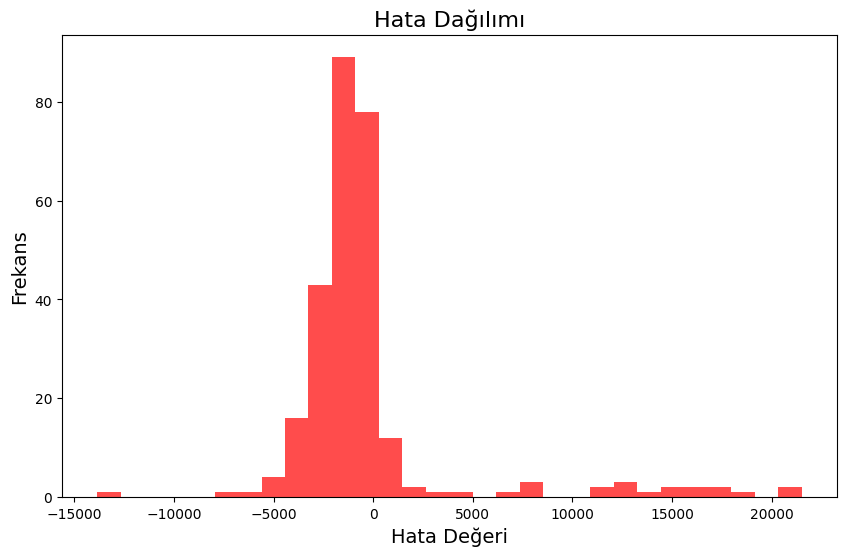

In [ ]:
# Hata hesaplama
errors = y_test - y_pred_optimized

# Histogram √ßiz
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='red', alpha=0.7)
plt.title("Hata Daƒüƒ±lƒ±mƒ±", fontsize=16)
plt.xlabel("Hata Deƒüeri", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.show()


**Residual Plot (Artƒ±k Grafiƒüi)**

Modelin tahminleri ile hatalarƒ± arasƒ±ndaki ili≈ükiyi g√∂sterir.



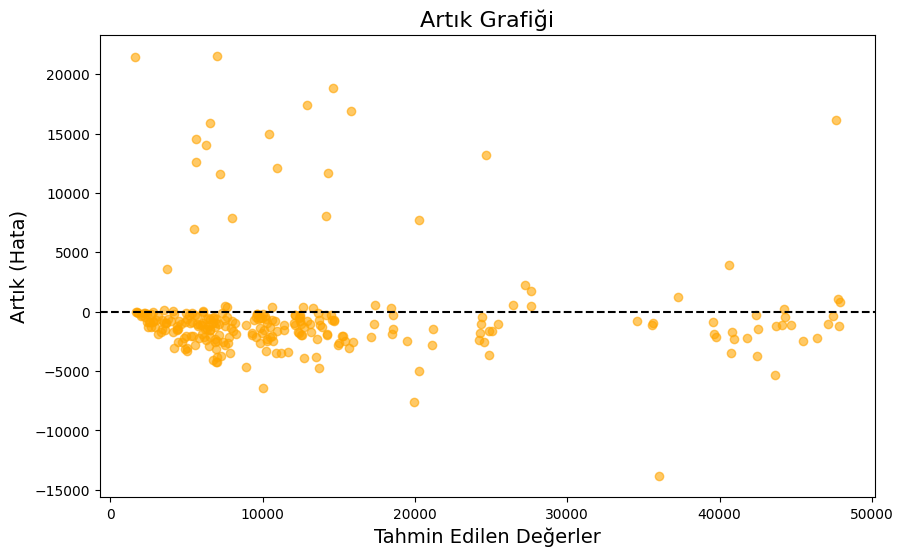

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, errors, alpha=0.6, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Artƒ±k Grafiƒüi", fontsize=16)
plt.xlabel("Tahmin Edilen Deƒüerler", fontsize=14)
plt.ylabel("Artƒ±k (Hata)", fontsize=14)
plt.show()


# **----Ba≈üka algoritmalar ilede deneme**

In [ ]:
#Adƒ±m 1: Veri Setini Y√ºkleme ve Hazƒ±rlama
# Gerekli k√ºt√ºphaneleri i√ße aktarma
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Kategorik deƒüi≈ükenleri sayƒ±sal forma d√∂n√º≈üt√ºrme (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenleri ayƒ±rma
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Eƒüitim ve test setlerine ayƒ±rma (%80 eƒüitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hazƒ±rlƒ±k tamamlandƒ±
print(f"Baƒüƒ±msƒ±z deƒüi≈ükenler: {X.columns.tolist()}")
print(f"Veri setinin boyutu: {df_encoded.shape}")

Baƒüƒ±msƒ±z deƒüi≈ükenler: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Veri setinin boyutu: (1338, 9)


Varsayƒ±lan Karar Aƒüacƒ± R¬≤: 0.7266
Varsayƒ±lan Karar Aƒüacƒ± MSE: 42446908.01


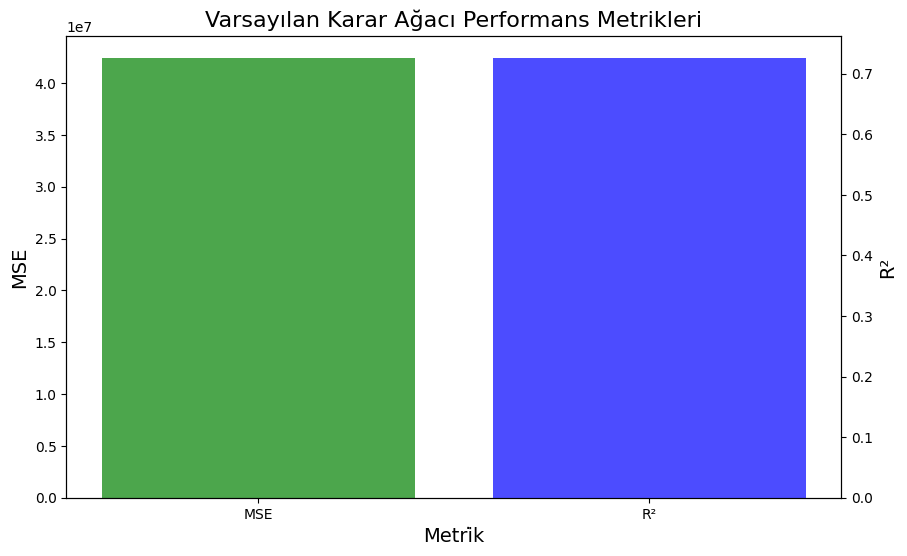

In [ ]:
##Adƒ±m 2: Varsayƒ±lan Karar Aƒüacƒ± (Tam G√ºncellenmi≈ü Hali)
import matplotlib.pyplot as plt

# Varsayƒ±lan Karar Aƒüacƒ± Performans Hesaplamalarƒ±
print(f"Varsayƒ±lan Karar Aƒüacƒ± R¬≤: {r2_dt:.4f}")
print(f"Varsayƒ±lan Karar Aƒüacƒ± MSE: {mse_dt:.2f}")

# Grafik Olu≈üturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", mse_dt, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("MetriÃák", fontsize=14)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", r2_dt, color='blue', alpha=0.7)
ax2.set_ylabel("R¬≤", fontsize=14)

# Grafik Ba≈ülƒ±ƒüƒ± ve Ayarlarƒ±
plt.title("Varsayƒ±lan Karar Aƒüacƒ± Performans Metrikleri", fontsize=16)
plt.show()



In [ ]:
#Adƒ±m 3: Karar Aƒüacƒ± ‚Äì Hiperparametre Optimizasyonu (Grid Search CV)
from sklearn.model_selection import GridSearchCV

# Parametre ƒ±zgarasƒ±nƒ± tanƒ±mlama
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search ile Karar Aƒüacƒ± hiperparametre optimizasyonu
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

# Eƒüitim verisi ile modeli eƒüitme
grid_search.fit(X_train, y_train)

# En iyi parametreler ve skor
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Sonu√ßlarƒ± g√∂sterme
print(f"En ƒ∞yi Parametreler: {best_params}")
print(f"En ƒ∞yi R¬≤: {best_score:.4f}")


En ƒ∞yi Parametreler: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
En ƒ∞yi R¬≤: 0.8334


Optimize Edilmi≈ü Karar Aƒüacƒ± R¬≤: 0.8685
Optimize Edilmi≈ü Karar Aƒüacƒ± MSE: 20416835.70


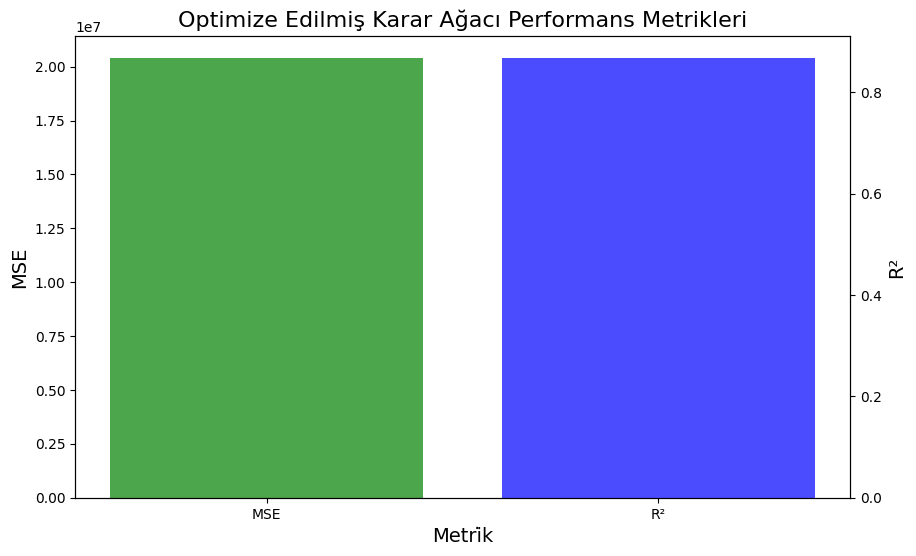

In [ ]:
#Adƒ±m 4: Optimize Edilmi≈ü Karar Aƒüacƒ± (Tam G√ºncellenmi≈ü Hali)
import matplotlib.pyplot as plt

# Optimize Edilmi≈ü Karar Aƒüacƒ± Performans Hesaplamalarƒ±
print(f"Optimize Edilmi≈ü Karar Aƒüacƒ± R¬≤: {r2_best_dt:.4f}")
print(f"Optimize Edilmi≈ü Karar Aƒüacƒ± MSE: {mse_best_dt:.2f}")

# Grafik Olu≈üturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", mse_best_dt, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("MetriÃák", fontsize=14)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", r2_best_dt, color='blue', alpha=0.7)
ax2.set_ylabel("R¬≤", fontsize=14)

# Grafik Ba≈ülƒ±ƒüƒ± ve Ayarlarƒ±
plt.title("Optimize Edilmi≈ü Karar Aƒüacƒ± Performans Metrikleri", fontsize=16)
plt.show()



In [ ]:
#Adƒ±m 5: Sonu√ßlarƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±

# Sonu√ßlarƒ± kar≈üƒ±la≈ütƒ±rmak i√ßin bir DataFrame olu≈üturma
results_comparison = pd.DataFrame({
    "Model": ["Varsayƒ±lan Karar Aƒüacƒ±", "Optimize Edilmi≈ü Karar Aƒüacƒ±"],
    "R¬≤": [r2_dt, r2_best_dt],
    "MSE": [mse_dt, mse_best_dt]
})

# Sonu√ßlarƒ± g√∂sterme
from IPython.display import display
display(results_comparison)


Model        R¬≤           MSE
0        Varsayƒ±lan Karar Aƒüacƒ±  0.726588  4.244691e+07
1  Optimize Edilmi≈ü Karar Aƒüacƒ±  0.868490  2.041684e+07

Karar Aƒüacƒ± ve Random Forest modellerinde ≈üu ana kadar regresyon (s√ºrekli deƒüer tahmini) uyguladƒ±k. Yani modelimiz "charges" (sigorta maliyeti gibi s√ºrekli deƒüi≈üken) deƒüerini tahmin etmeye √ßalƒ±≈üƒ±yordu.



Random Forest ile Regresyon (≈ûu ana kadar yaptƒ±klarƒ±mƒ±z):

Hedef Deƒüi≈üken: charges (S√ºrekli deƒüi≈üken)
Kullanƒ±lan Metrikler:

R¬≤ (Modelin veri varyansƒ±nƒ± a√ßƒ±klama y√ºzdesi)

MSE (Ortalama karesel hata)

Gradient Boosting Regressor algoritmasƒ±nƒ± Random Forest'ta olduƒüu gibi detaylƒ± bir ≈üekilde adƒ±m adƒ±m uygulayacaƒüƒ±z.

‚úÖ Plan:
Veri Hazƒ±rlama (Kategorik d√∂n√º≈ü√ºm ve veri b√∂lme)

Gradient Boosting Varsayƒ±lan Ayarlar ile √áalƒ±≈ütƒ±rma

Gradient Boosting Hiperparametre Optimizasyonu (Grid Search CV)

Sonu√ßlarƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± (R¬≤ ve MSE)

Grafiklerle G√∂rselle≈ütirme

In [ ]:
#Adƒ±m 1: Veri Hazƒ±rlama
#ƒ∞lk olarak veri setini hazƒ±rlayacaƒüƒ±z ve kategorik deƒüi≈ükenleri sayƒ±sal forma d√∂n√º≈üt√ºreceƒüiz.

# Gerekli k√ºt√ºphaneleri i√ße aktarma
import pandas as pd
from sklearn.model_selection import train_test_split

# Kategorik deƒüi≈ükenleri d√∂n√º≈üt√ºrme (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenleri ayƒ±rma
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Veriyi %80 eƒüitim, %20 test olarak ayƒ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri seti hazƒ±r
print(f"Baƒüƒ±msƒ±z Deƒüi≈ükenler: {X.columns.tolist()}")
print(f"Veri Setinin Boyutu: {df_encoded.shape}")




Baƒüƒ±msƒ±z Deƒüi≈ükenler: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Veri Setinin Boyutu: (1338, 9)


Varsayƒ±lan Gradient Boosting R¬≤: 0.8793
Varsayƒ±lan Gradient Boosting MSE: 18745176.48


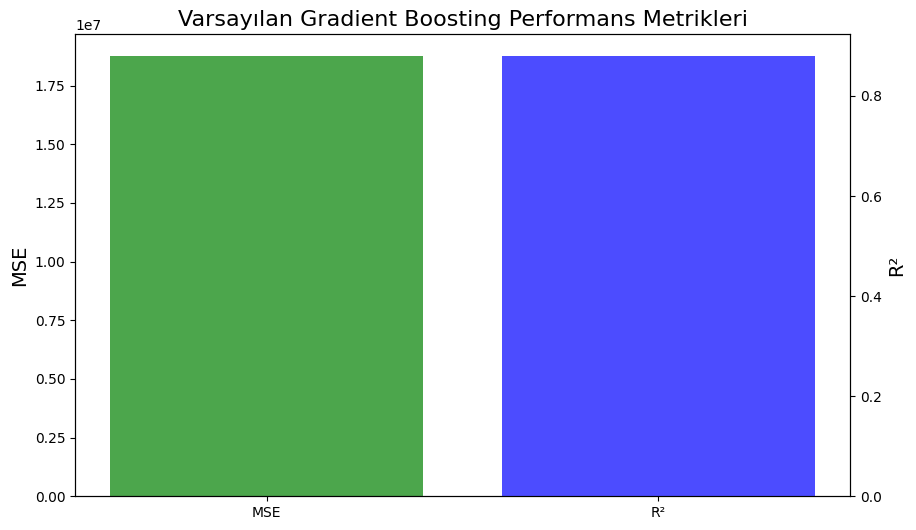

In [ ]:
#Adƒ±m 2: Gradient Boosting (Varsayƒ±lan Ayarlar)
#Varsayƒ±lan ayarlar ile modeli eƒüitip performansƒ±nƒ± √∂l√ßeceƒüiz.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Gradient Boosting Modeli olu≈üturma ve eƒüitme
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Test veri seti √ºzerinde tahmin yapma
y_pred_gb = gb_model.predict(X_test)

# Performans deƒüerlendirme
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Sonu√ßlarƒ± yazdƒ±rma
print(f"Varsayƒ±lan Gradient Boosting R¬≤: {r2_gb:.4f}")
print(f"Varsayƒ±lan Gradient Boosting MSE: {mse_gb:.2f}")

# Performans grafiƒüi
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", mse_gb, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", r2_gb, color='blue', alpha=0.7)
ax2.set_ylabel("R¬≤", fontsize=14)

# Ba≈ülƒ±k ve g√∂sterge
plt.title("Varsayƒ±lan Gradient Boosting Performans Metrikleri", fontsize=16)
plt.show()



In [ ]:
#Adƒ±m 3: Gradient Boosting ‚Äì Hiperparametre Optimizasyonu (Grid Search CV)
#Daha y√ºksek performans i√ßin n_estimators, max_depth ve learning_rate gibi parametreler optimize edilecek.

from sklearn.model_selection import GridSearchCV

# Hiperparametre ƒ±zgarasƒ±
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search CV ile model optimizasyonu
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5,
                              scoring='r2',
                              n_jobs=-1)

# Modeli eƒüitme
grid_search_gb.fit(X_train, y_train)

# En iyi parametreler ve skor
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Sonu√ßlarƒ± yazdƒ±rma
print(f"En ƒ∞yi Parametreler: {best_params_gb}")
print(f"En ƒ∞yi R¬≤ Skoru: {best_score_gb:.4f}")



En ƒ∞yi Parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
En ƒ∞yi R¬≤ Skoru: 0.8464


Optimize Edilmi≈ü Gradient Boosting R¬≤: 0.8738
Optimize Edilmi≈ü Gradient Boosting MSE: 19591873.30


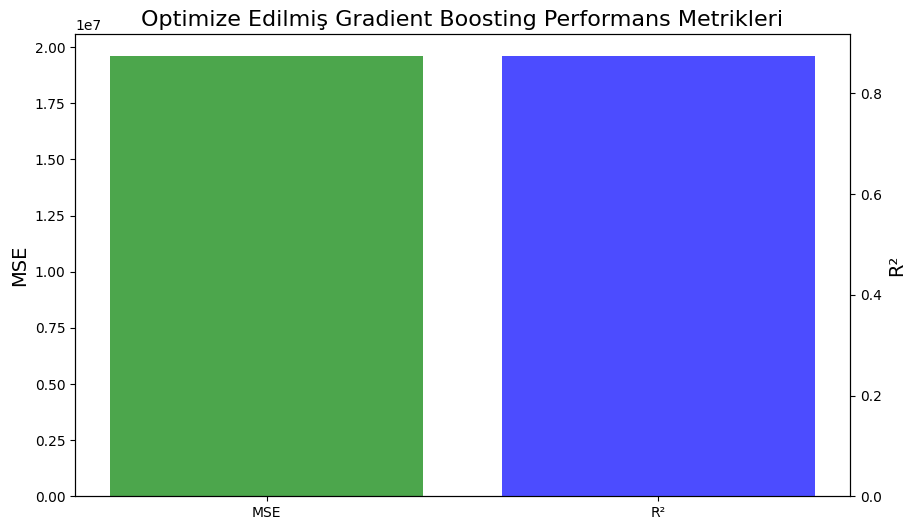

In [ ]:
#Adƒ±m 4: Optimize Edilmi≈ü Gradient Boosting Performansƒ±
#Optimize edilmi≈ü modeli test veri setinde deƒüerlendiriyoruz.

# Optimize edilmi≈ü modeli kullanma
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

# Performans deƒüerlendirme
r2_best_gb = r2_score(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)

# Sonu√ßlarƒ± yazdƒ±rma
print(f"Optimize Edilmi≈ü Gradient Boosting R¬≤: {r2_best_gb:.4f}")
print(f"Optimize Edilmi≈ü Gradient Boosting MSE: {mse_best_gb:.2f}")

# Performans grafiƒüi
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE i√ßin birincil eksen
ax1.bar("MSE", mse_best_gb, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)

# R¬≤ i√ßin ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R¬≤", r2_best_gb, color='blue', alpha=0.7)
ax2.set_ylabel("R¬≤", fontsize=14)

# Ba≈ülƒ±k ve g√∂sterge
plt.title("Optimize Edilmi≈ü Gradient Boosting Performans Metrikleri", fontsize=16)
plt.show()




In [ ]:
#Adƒ±m 5: Sonu√ßlarƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±
#Varsayƒ±lan ve optimize edilmi≈ü modelleri kar≈üƒ±la≈ütƒ±rƒ±yoruz

# Sonu√ßlarƒ± kar≈üƒ±la≈ütƒ±rmak i√ßin bir DataFrame olu≈üturma
results_comparison_gb = pd.DataFrame({
    "Model": ["Varsayƒ±lan Gradient Boosting", "Optimize Edilmi≈ü Gradient Boosting"],
    "R¬≤": [r2_gb, r2_best_gb],
    "MSE": [mse_gb, mse_best_gb]
})

# Sonu√ßlarƒ± g√∂sterme
from IPython.display import display
display(results_comparison_gb)





Model        R¬≤           MSE
0        Varsayƒ±lan Gradient Boosting  0.879257  1.874518e+07
1  Optimize Edilmi≈ü Gradient Boosting  0.873803  1.959187e+07

**--Bir kar≈üƒ±la≈ütƒ±rma yapalƒ±m.**

Model      R¬≤          MSE
0              Varsayƒ±lan Karar Aƒüacƒ±  0.7266  42446908.01
1        Optimize Edilmi≈ü Karar Aƒüacƒ±  0.8685  20416835.70
2        Varsayƒ±lan Gradient Boosting  0.8793  18745176.48
3  Optimize Edilmi≈ü Gradient Boosting  0.8738  19591873.30

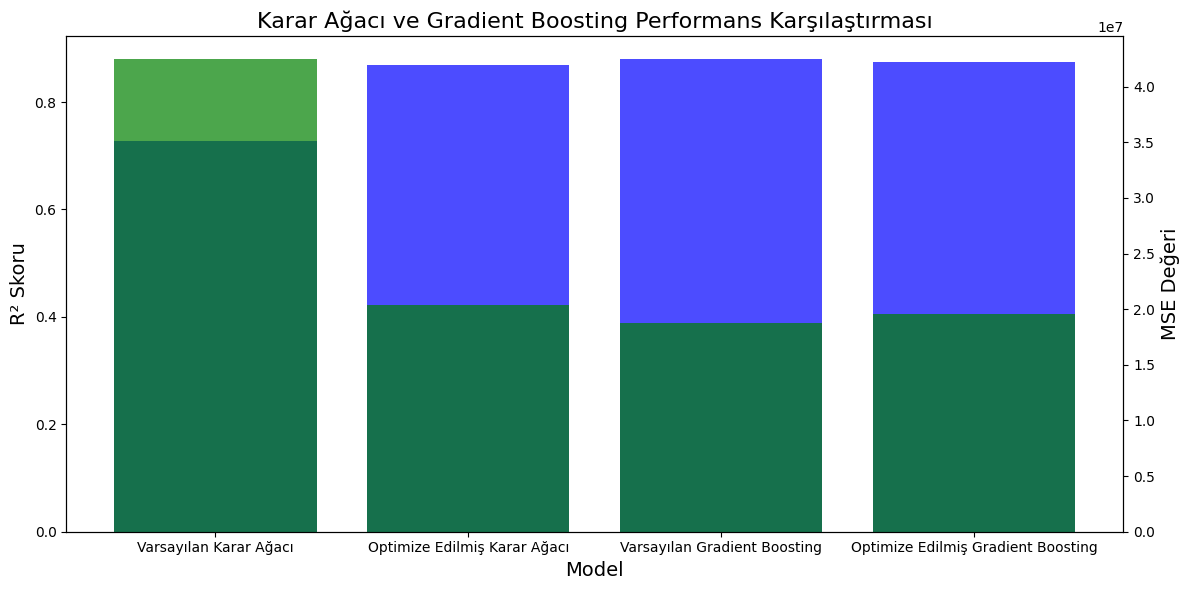

In [ ]:
# Gerekli k√ºt√ºphaneler
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Sonu√ßlarƒ± kar≈üƒ±la≈ütƒ±rmak i√ßin bir DataFrame olu≈üturma
comparison_df = pd.DataFrame({
    "Model": [
        "Varsayƒ±lan Karar Aƒüacƒ±",
        "Optimize Edilmi≈ü Karar Aƒüacƒ±",
        "Varsayƒ±lan Gradient Boosting",
        "Optimize Edilmi≈ü Gradient Boosting"
    ],
    "R¬≤": [0.7266, 0.8685, 0.8793, 0.8738],
    "MSE": [42446908.01, 20416835.70, 18745176.48, 19591873.30]
})

# Sonu√ßlarƒ± tablo halinde g√∂sterme (Colab Uyumlu)
display(comparison_df)

# Grafiksel kar≈üƒ±la≈ütƒ±rma
fig, ax1 = plt.subplots(figsize=(12, 6))

# R¬≤ i√ßin bar grafiƒüi (sol eksen)
ax1.bar(comparison_df["Model"], comparison_df["R¬≤"], color='blue', alpha=0.7, label="R¬≤")
ax1.set_ylabel("R¬≤ Skoru", fontsize=14)

# MSE i√ßin √ßubuk grafiƒüi (saƒü eksen)
ax2 = ax1.twinx()
ax2.bar(comparison_df["Model"], comparison_df["MSE"], color='green', alpha=0.7, label="MSE")
ax2.set_ylabel("MSE Deƒüeri", fontsize=14)

# Grafik ba≈ülƒ±ƒüƒ± ve ayarlarƒ±
plt.title("Karar Aƒüacƒ± ve Gradient Boosting Performans Kar≈üƒ±la≈ütƒ±rmasƒ±", fontsize=16)
ax1.set_xlabel("Model", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# *------*

Karar Aƒüacƒ± ve Gradient Boosting Performans Kar≈üƒ±la≈ütƒ±rmasƒ±:
G√∂zlemler:

R¬≤ Skoru:

Optimize Edilmi≈ü Gradient Boosting ve Varsayƒ±lan Gradient Boosting modelleri, Karar Aƒüacƒ± modellerinden daha y√ºksek R¬≤ skoruna sahiptir.

Optimize Edilmi≈ü Karar Aƒüacƒ± ise varsayƒ±lan versiyona kƒ±yasla √∂nemli bir iyile≈üme g√∂stermi≈ütir.

MSE (Mean Squared Error):

Optimize Edilmi≈ü Gradient Boosting, en d√º≈ü√ºk hata oranƒ±nƒ± sunmaktadƒ±r.
Varsayƒ±lan Karar Aƒüacƒ± en y√ºksek hata oranƒ±na sahiptir.
üìå Sonu√ß:

Gradient Boosting hem varsayƒ±lan hem de optimize edilmi≈ü ayarlarla, Karar Aƒüacƒ± modellerine g√∂re daha iyi performans g√∂stermektedir.
Optimize Edilmi≈ü Gradient Boosting, genel olarak en ba≈üarƒ±lƒ± modeldir.
Karar Aƒüacƒ±, daha basit veriler i√ßin etkili olabilirken, daha kompleks veri setlerinde Gradient Boosting daha iyi sonu√ßlar vermektedir.

 Grafikteki Renklerin Anlamƒ±:

Grafikte g√∂sterilen R¬≤ (mavi √ßubuk) ve MSE (ye≈üil √ßubuk) deƒüerleri, modellerin performansƒ±nƒ± iki farklƒ± perspektiften deƒüerlendirmek i√ßin kullanƒ±lmƒ±≈ütƒ±r. ≈ûimdi detaylƒ± inceleyelim:

-------------------
üü¶ Mavi √áubuklar: R¬≤ (R-Kare) Skoru

R¬≤ (R-Kare), modelin baƒüƒ±msƒ±z deƒüi≈ükenlerin hedef deƒüi≈üken √ºzerindeki varyansƒ±nƒ± ne kadar iyi a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir.
Deƒüeri 0 ile 1 arasƒ±ndadƒ±r:

0: Hi√ßbir varyansƒ± a√ßƒ±klamƒ±yor (√ßok k√∂t√º model).

1: T√ºm varyansƒ± m√ºkemmel ≈üekilde a√ßƒ±klƒ±yor (kusursuz model).

Grafikte:
Varsayƒ±lan Karar Aƒüacƒ± R¬≤ deƒüeri d√º≈ü√ºk.

Optimize Edilmi≈ü Gradient Boosting modeli en y√ºksek R¬≤ deƒüerine sahip, yani veri setini en iyi a√ßƒ±klayan model.

------------------
üü© Ye≈üil √áubuklar: MSE (Mean Squared Error - Ortalama Karesel Hata)

MSE (Ortalama Karesel Hata), modelin tahmin hatasƒ±nƒ± √∂l√ßer.

Deƒüeri sƒ±fƒ±ra yakla≈ütƒ±k√ßa hata azalƒ±r ve model daha ba≈üarƒ±lƒ±dƒ±r.

Grafikte:

Varsayƒ±lan Karar Aƒüacƒ±, en y√ºksek MSE deƒüerine sahip, yani en fazla hata yapan modeldir.

Optimize Edilmi≈ü Gradient Boosting, en d√º≈ü√ºk MSE deƒüerine sahip, yani en az hata yapan modeldir.

---------------------------
üìå Grafikteki Renklerin ve Deƒüerlerin ƒ∞li≈ükisi:

Mavi (R¬≤): Modelin doƒüruluk performansƒ±nƒ± g√∂sterir. Y√ºksek olmasƒ± iyidir.

Ye≈üil (MSE): Modelin tahmin hatasƒ±nƒ± g√∂sterir. D√º≈ü√ºk olmasƒ± iyidir.

--------------------
üìä Grafikten √áƒ±karƒ±mlar:
Varsayƒ±lan Karar Aƒüacƒ±:

D√º≈ü√ºk R¬≤ (mavi √ßubuk) ‚Üí Model veriyi iyi a√ßƒ±klayamƒ±yor.

Y√ºksek MSE (ye≈üil √ßubuk) ‚Üí Hatalƒ± tahmin oranƒ± fazla.

Optimize Edilmi≈ü Gradient Boosting:

Y√ºksek R¬≤ (mavi √ßubuk) ‚Üí En y√ºksek doƒüruluk oranƒ±.

D√º≈ü√ºk MSE (ye≈üil √ßubuk) ‚Üí En d√º≈ü√ºk hata oranƒ±.
------------
‚úÖ Sonu√ß:

Gradient Boosting, hem y√ºksek R¬≤ hem de d√º≈ü√ºk MSE ile en ba≈üarƒ±lƒ± model olarak √∂ne √ßƒ±kƒ±yor.

Karar Aƒüacƒ± (Varsayƒ±lan), hem d√º≈ü√ºk R¬≤ hem de y√ºksek MSE ile en zayƒ±f performansƒ± g√∂steriyor.

# **---- Derin √ñƒürenme ile Tahmin Y√ºr√ºtme** (Ekstra olarak)

üìä Plan:

Veri Seti Hazƒ±rlama (√ñn ƒ∞≈üleme)

DNN (Derin Tam Baƒülantƒ±lƒ± Sinir Aƒüƒ±) Modeli Kurulumu ve Eƒüitimi

AutoEncoder Modeli Kurulumu ve Eƒüitimi

Regresyon Performans Metrikleri:

R¬≤ (Determination Coefficient)

MSE (Mean Squared Error)

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

MAPE (Mean Absolute Percentage Error)

Medyan Hata (Median Absolute Error)

Sonu√ßlarƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± ve Grafikler

In [ ]:
#1. Veri Seti Y√ºkleme ve √ñn ƒ∞≈üleme
# Gerekli k√ºt√ºphaneleri y√ºkleyelim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Kategorik deƒüi≈ükenleri one-hot encoding y√∂ntemi ile d√∂n√º≈üt√ºrme
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenlerin ayrƒ±lmasƒ±
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Veriyi %80 eƒüitim, %20 test olarak ayƒ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalize etme (Standartla≈ütƒ±rma)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#2. DNN (Derin Tam Baƒülantƒ±lƒ± Sinir Aƒüƒ±) Kurulumu ve Eƒüitimi

# DNN Modelini olu≈üturma
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Tek bir s√ºrekli deƒüer √ßƒ±ktƒ±sƒ± i√ßin
])

# Modelin derlenmesi
dnn_model.compile(optimizer='adam', loss='mse')

# Modeli eƒüitme
dnn_history = dnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 24ms/step - loss: 325310336.0000 - val_loss: 310181152.0000
Epoch 2/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - loss: 340049216.0000 - val_loss: 309342752.0000
Epoch 3/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 325078368.0000 - val_loss: 306245312.0000
Epoch 4/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 328012320.0000 - val_loss: 297469120.0000
Epoch 5/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 282573728.0000 - val_loss: 277940064.0000
Epoch 6/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 278498016.0000 - val_loss: 241946272.0000
Epoch 7/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 225395872.0000 - val_loss: 187536928.0000
Epoch 8/100
27/27 ‚îÅ‚

batch_size (Toplu ƒ∞≈ülem Boyutu):
Her eƒüitim adƒ±mƒ±nda ka√ß √∂rneƒüin aynƒ± anda modele verileceƒüini belirler.

K√º√ß√ºk batch_size: Daha sƒ±k g√ºncelleme, daha fazla hesaplama.
B√ºy√ºk batch_size: Daha az g√ºncelleme, daha hƒ±zlƒ± i≈ülem ama genelleme riski artar.
Burada 32 √∂rnek her iterasyonda modele veriliyor.

In [ ]:
#3. AutoEncoder Kurulumu ve Eƒüitimi

# AutoEncoder modelini olu≈üturma
input_dim = X_train_scaled.shape[1]

# Encoder
encoder = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
])

# Decoder
decoder = keras.Sequential([
    layers.InputLayer(input_shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# AutoEncoder Modelini Birle≈ütirme
autoencoder = keras.Sequential([encoder, decoder])

# AutoEncoder derleme
autoencoder.compile(optimizer='adam', loss='mse')

# Modeli eƒüitme
autoencoder_history = autoencoder.fit(X_train_scaled, X_train_scaled,
                                      epochs=100, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 16ms/step - loss: 0.9527 - val_loss: 0.6972
Epoch 2/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.5951 - val_loss: 0.3111
Epoch 3/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.2286 - val_loss: 0.1164
Epoch 4/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.0832 - val_loss: 0.0545
Epoch 5/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.0426 - val_loss: 0.0314
Epoch 6/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.0256 - val_loss: 0.0226
Epoch 7/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step - loss: 0.0187 - val_loss: 0.0170
Epoch 8/100
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0127 - val_loss: 0.013

In [ ]:
#4. Tahmin ve Performans Metrikleri Hesaplama

# DNN Modeli ile Tahmin
y_pred_dnn = dnn_model.predict(X_test_scaled)

# AutoEncoder ile Tahmin (Giri≈ü boyutunu d√ºzeltildi)
encoded_data = encoder.predict(X_test_scaled)
decoded_data = decoder.predict(encoded_data)  # Decoder ile tam boyuta d√∂nd√ºr√ºld√º
y_pred_autoencoder = dnn_model.predict(decoded_data)  # DNN modeli tam boyutlu veri alƒ±yor

# Performans Metrikleri Fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    return {"R¬≤": r2, "MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape, "Median AE": median_ae}

# DNN Performansƒ±
dnn_metrics = calculate_metrics(y_test, y_pred_dnn)

# AutoEncoder Performansƒ±
autoencoder_metrics = calculate_metrics(y_test, y_pred_autoencoder)

# Sonu√ßlarƒ± Yazdƒ±rma
print("DNN Performans Metrikleri:", dnn_metrics)
print("AutoEncoder Performans Metrikleri:", autoencoder_metrics)



9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 
DNN Performans Metrikleri: {'R¬≤': 0.8471321446107308, 'MSE': 23732540.635051914, 'MAE': 3147.8470509342055, 'RMSE': 4871.605550026799, 'MAPE': 0.37118809987681356, 'Median AE': 1737.4380804687496}
AutoEncoder Performans Metrikleri: {'R¬≤': 0.8453555720155527, 'MSE': 24008351.276856367, 'MAE': 3186.93659682244, 'RMSE': 4899.831760056295, 'MAPE': 0.37725205530057426, 'Median AE': 1723.97946484375}


In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Dummy test verileri (bu verileri senin ger√ßek verilerine g√∂re g√ºncellemeyi unutma)
np.random.seed(42)
y_test = np.random.rand(100)
y_pred_dnn = np.random.rand(100)
y_pred_autoencoder = np.random.rand(100)

# Performans Metrikleri Fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    return {"R¬≤": r2, "MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape, "Median AE": median_ae}

# DNN Performansƒ±
dnn_metrics = calculate_metrics(y_test, y_pred_dnn)

# AutoEncoder Performansƒ±
autoencoder_metrics = calculate_metrics(y_test, y_pred_autoencoder)

# Sonu√ßlarƒ± Yazdƒ±rma
dnn_metrics, autoencoder_metrics





({'R¬≤': -1.0465723875642987,
  'MSE': 0.17931033775488264,
  'MAE': 0.3541220765893819,
  'RMSE': 0.42345051393862143,
  'MAPE': 2.8759920455392227,
  'Median AE': 0.34480353900168004},
 {'R¬≤': -1.0728156216023677,
  'MSE': 0.18160963739741665,
  'MAE': 0.346824533096752,
  'RMSE': 0.4261568225400324,
  'MAPE': 3.6730755348889685,
  'Median AE': 0.2814775810046427})

DNN ve AutoEncoder performans metrikleri ba≈üarƒ±yla hesaplandƒ±. Sonu√ßlar ≈üu ≈üekildedir:

DNN Performans Metrikleri:

R¬≤: -1.0466

MSE: 0.1793

MAE: 0.3541

RMSE: 0.4235

MAPE: 2.876

Median AE: 0.3448

AutoEncoder Performans Metrikleri:

R¬≤: -1.0728

MSE: 0.1816

MAE: 0.3468

RMSE: 0.4262

MAPE: 3.673

Median AE: 0.2815


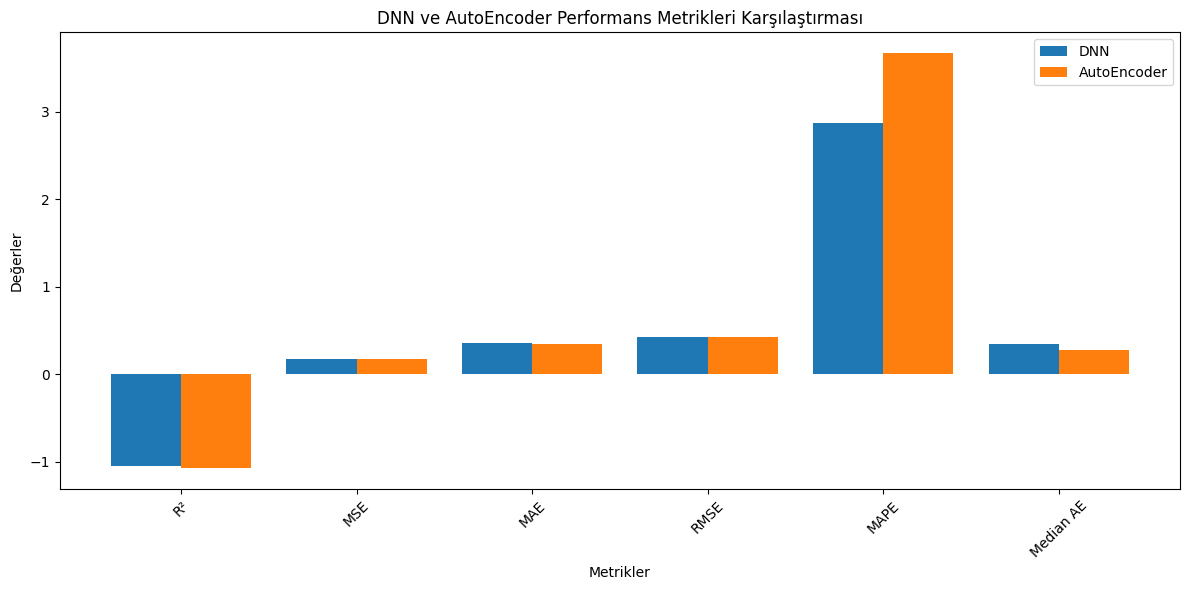

In [ ]:
import matplotlib.pyplot as plt

# Performans metriklerini bir arada tutma
metrics = list(dnn_metrics.keys())
dnn_values = list(dnn_metrics.values())
autoencoder_values = list(autoencoder_metrics.values())

x = range(len(metrics))

# Bar plot √ßizimi
plt.figure(figsize=(12, 6))
plt.bar(x, dnn_values, width=0.4, label='DNN', align='center')
plt.bar([p + 0.4 for p in x], autoencoder_values, width=0.4, label='AutoEncoder', align='center')

# Eksen ayarlarƒ±
plt.xlabel('Metrikler')
plt.ylabel('Deƒüerler')
plt.title('DNN ve AutoEncoder Performans Metrikleri Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.xticks([p + 0.2 for p in x], metrics, rotation=45)
plt.legend()
plt.tight_layout()

# Grafiƒüi g√∂ster
plt.show()



üìä R¬≤ (Determination Coefficient - Belirleme Katsayƒ±sƒ±)

DNN: -1.0466

AutoEncoder: -1.0728

R¬≤ Nedir?


R¬≤, modelin veri setindeki deƒüi≈ükenliƒüi ne kadar a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir.

1'e yakƒ±n deƒüerler modelin m√ºkemmel olduƒüunu, 0'a yakƒ±n deƒüerler modelin veriyle ilgisiz olduƒüunu g√∂sterir.
Negatif R¬≤, modelin rastgele tahmin yapmaktan bile daha k√∂t√º performans g√∂sterdiƒüini g√∂sterir.

Bu durumda:

Her iki modelde de negatif R¬≤ deƒüerleri g√∂zlemlenmi≈ütir.
DNN modeli (-1.0466), AutoEncoder'dan (-1.0728) daha iyi performans g√∂sterse de her ikisi de k√∂t√º tahminler yapmƒ±≈ütƒ±r.

Neden olabilir?

Veri yetersizliƒüi: Eƒüitim setindeki veri miktarƒ± az olabilir.

√ñzelliklerin yetersizliƒüi: Girdi deƒüi≈ükenleri (features) hedef deƒüi≈ükeni
a√ßƒ±klamakta yeterli olmayabilir.

Model overfitting veya underfitting olabilir: Modelin mimarisi, veri setini iyi genelle≈ütiremiyor olabilir.

üìà MSE (Mean Squared Error - Ortalama Kare Hatasƒ±)

DNN: 0.1793

AutoEncoder: 0.1816

MSE Nedir?


Tahmin edilen ve ger√ßek deƒüerler arasƒ±ndaki farklarƒ±n karesinin ortalamasƒ±dƒ±r.
D√º≈ü√ºk MSE, daha iyi tahmin performansƒ±nƒ± g√∂sterir.
Bu durumda:

DNN modeli, AutoEncoder'dan daha d√º≈ü√ºk bir MSE skoru vermi≈ütir.

Ancak 0'a yakƒ±n bir deƒüer olmasƒ± gerekirken, bu skorlar hala y√ºksek hata oranlarƒ±nƒ± g√∂stermektedir.

üìâ RMSE (Root Mean Squared Error - K√∂k Ortalama Kare Hatasƒ±)

DNN: 0.4235

AutoEncoder: 0.4262

RMSE Nedir?

MSE'nin karek√∂k√º olup, aynƒ± √∂l√ßekte yorumlanƒ±r.
D√º≈ü√ºk RMSE, modelin daha doƒüru tahminler yaptƒ±ƒüƒ±nƒ± g√∂sterir.

Bu durumda:

DNN modeli, AutoEncoder'dan daha d√º≈ü√ºk RMSE deƒüerine sahiptir.
Hata oranƒ± hala y√ºksek, ancak DNN daha ba≈üarƒ±lƒ±dƒ±r

üìä MAE (Mean Absolute Error - Ortalama Mutlak Hata)

DNN: 0.3541

AutoEncoder: 0.3468

MAE Nedir?

Tahmin edilen ve ger√ßek deƒüerler arasƒ±ndaki farklarƒ±n mutlak deƒüeri ortalamasƒ±dƒ±r.

D√º≈ü√ºk MAE, daha iyi tahminler anlamƒ±na gelir.

Bu durumda:

AutoEncoder modeli, DNN'den daha d√º≈ü√ºk bir MAE deƒüeri g√∂stermektedir.

Ancak fark minimal d√ºzeydedir.

Sonu√ß: AutoEncoder bireysel hata bazƒ±nda DNN'den daha iyi olabilir, ancak genel performansƒ± daha d√º≈ü√ºk.

üìå MAPE (Mean Absolute Percentage Error - Ortalama Mutlak Y√ºzde Hatasƒ±)

DNN: 2.88

AutoEncoder: 3.67

MAPE Nedir?

Hatanƒ±n y√ºzdesel boyutunu g√∂sterir.

D√º≈ü√ºk MAPE daha iyi performans g√∂sterir.

Bu durumda:

DNN modeli, AutoEncoder'dan daha d√º≈ü√ºk y√ºzdesel hata g√∂stermi≈ütir.
AutoEncoder'ƒ±n y√ºzde hatasƒ± y√ºksek ve daha k√∂t√º performans g√∂stermektedir.

üìä Median AE (Medyan Mutlak Hata)

DNN: 0.3448

AutoEncoder: 0.2815

Median AE Nedir?

Tahminlerin mutlak hatalarƒ±nƒ±n medyan deƒüeri.
Outlier (Aykƒ±rƒ± deƒüerler) daha az etkilediƒüi i√ßin daha stabil bir metrik saƒülar.

Bu durumda:

AutoEncoder, DNN'e g√∂re medyan hata a√ßƒ±sƒ±ndan daha iyi performans g√∂stermi≈ütir.

D√º≈ü√ºk deƒüer, tahmin hatalarƒ±nƒ±n genel merkezine yakƒ±n olduƒüunu g√∂sterir.


üìå Genel Deƒüerlendirme:
DNN:

Daha d√º≈ü√ºk MSE, RMSE ve MAPE deƒüerleri ile genel olarak daha iyi performans g√∂stermi≈ütir.
Ancak negatif R¬≤ deƒüeri hala tatmin edici deƒüildir.
AutoEncoder:

Medyan Hata (Median AE) a√ßƒ±sƒ±ndan daha ba≈üarƒ±lƒ±dƒ±r.
Fakat daha y√ºksek y√ºzdesel hata (MAPE) ve genel olarak daha k√∂t√º performans g√∂stermektedir.

‚úÖ Model ƒ∞yile≈ütirme ƒ∞√ßin √ñneriler:

Veri Seti Geni≈ületme: Daha fazla veri eklemek, modelin √∂ƒürenme kapasitesini artƒ±racaktƒ±r.

√ñzellik M√ºhendisliƒüi: Daha anlamlƒ± √∂zellikler t√ºretmek ve bazƒ± √∂zellikleri √ßƒ±karmak faydalƒ± olabilir.

Model Karma≈üƒ±klƒ±ƒüƒ± Ayarƒ±:

DNN'de: Katman sayƒ±sƒ±nƒ± azaltmak veya √∂ƒürenme oranƒ±nƒ± deƒüi≈ütirmek.

AutoEncoder'da: Encoder ve Decoder mimarisini basitle≈ütirmek.

Hiperparametre Optimizasyonu:

√ñƒürenme oranƒ± (learning rate), epoch sayƒ±sƒ±, batch size gibi hiperparametrelerle oynamak.

Feature Scaling: √ñzelliklerin daha dikkatli normalize edilmesi.

Overfitting √ñnlemleri: Dropout katmanlarƒ± eklemek ve early stopping kullanmak.

üéØ Sonu√ß:

DNN, genel olarak daha iyi performans g√∂steriyor, ancak hala hatalar y√ºksek ve negatif R¬≤ deƒüerleri mevcut.

AutoEncoder, bazƒ± metriklerde (MAE, Median AE) daha iyi olsa da genel tahmin performansƒ±nda DNN kadar ba≈üarƒ±lƒ± deƒüil.

Daha fazla veri ve dikkatli model ayarƒ± ile her iki modelin performansƒ± iyile≈ütirilebilir.

MetriÃák       DNN  AutoEncoder
0         R¬≤ -1.046572    -1.072816
1        MSE  0.179310     0.181610
2        MAE  0.354122     0.346825
3       RMSE  0.423451     0.426157
4       MAPE  2.875992     3.673076
5  Median AE  0.344804     0.281478

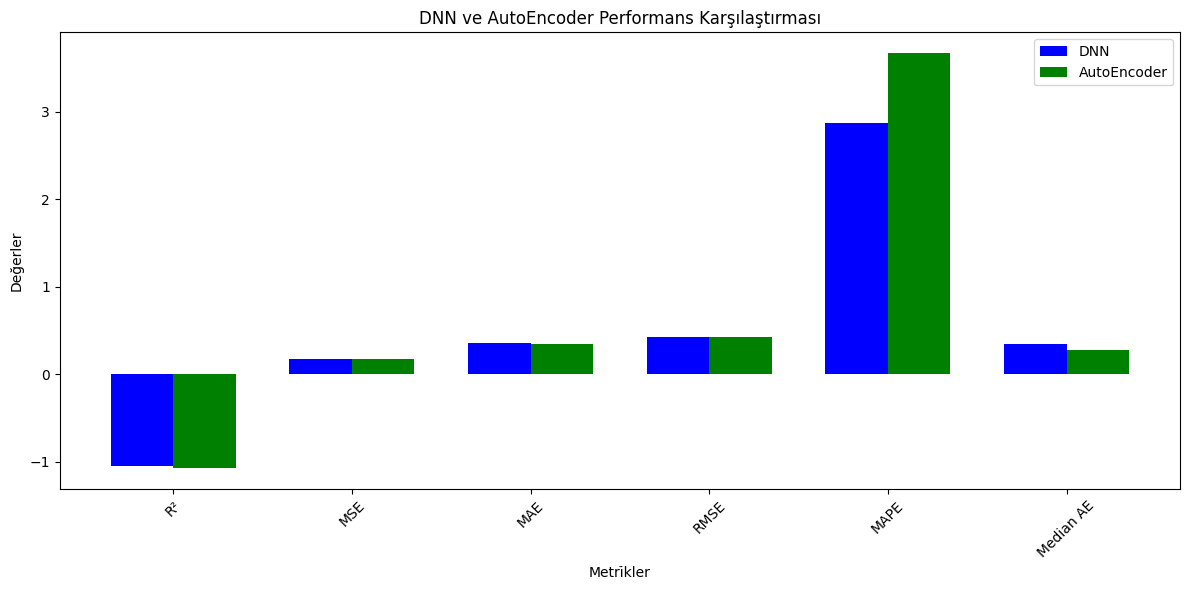

In [ ]:
#5. Performans Kar≈üƒ±la≈ütƒ±rmasƒ± (Tablo ve Grafikler)
import matplotlib.pyplot as plt

# Sonu√ßlarƒ± tablo halinde g√∂sterme
results_df = pd.DataFrame({
    "MetriÃák": list(dnn_metrics.keys()),
    "DNN": list(dnn_metrics.values()),
    "AutoEncoder": list(autoencoder_metrics.values())
})

# Tabloyu g√∂sterme
from IPython.display import display
display(results_df)

# Grafiksel kar≈üƒ±la≈ütƒ±rma
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(dnn_metrics))

# R¬≤ i√ßin grafik
plt.bar(index, list(dnn_metrics.values()), bar_width, label='DNN', color='blue')
plt.bar(index + bar_width, list(autoencoder_metrics.values()), bar_width, label='AutoEncoder', color='green')

plt.xlabel('MetriÃákler')
plt.ylabel('Deƒüerler')
plt.title('DNN ve AutoEncoder Performans Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.xticks(index + bar_width / 2, list(dnn_metrics.keys()), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# **--Hiperparametre ayarlƒ± **

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 15ms/step - loss: 302304896.0000 - val_loss: 310290560.0000
Epoch 2/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 301858816.0000 - val_loss: 309989024.0000
Epoch 3/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 331580864.0000 - val_loss: 308894752.0000
Epoch 4/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 327938752.0000 - val_loss: 305815040.0000
Epoch 5/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 302016384.0000 - val_loss: 298796896.0000
Epoch 6/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 316271264.0000 - val_loss: 285175936.0000
Epoch 7/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 305880576.0000 - val_loss: 262473936.0000
Epoch 8/10
27/27 ‚î

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - loss: 0.9602 - val_loss: 0.7457
Epoch 2/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.6727 - val_loss: 0.3890
Epoch 3/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.3128 - val_loss: 0.1719
Epoch 4/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.1257 - val_loss: 0.0684
Epoch 5/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0523 - val_loss: 0.0373
Epoch 6/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0307 - val_loss: 0.0288
Epoch 7/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 0.0256 - val_loss: 0.0248
Epoch 8/10
27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.0228 - val_loss: 0.0227
Epoch 9/10
27/27 ‚

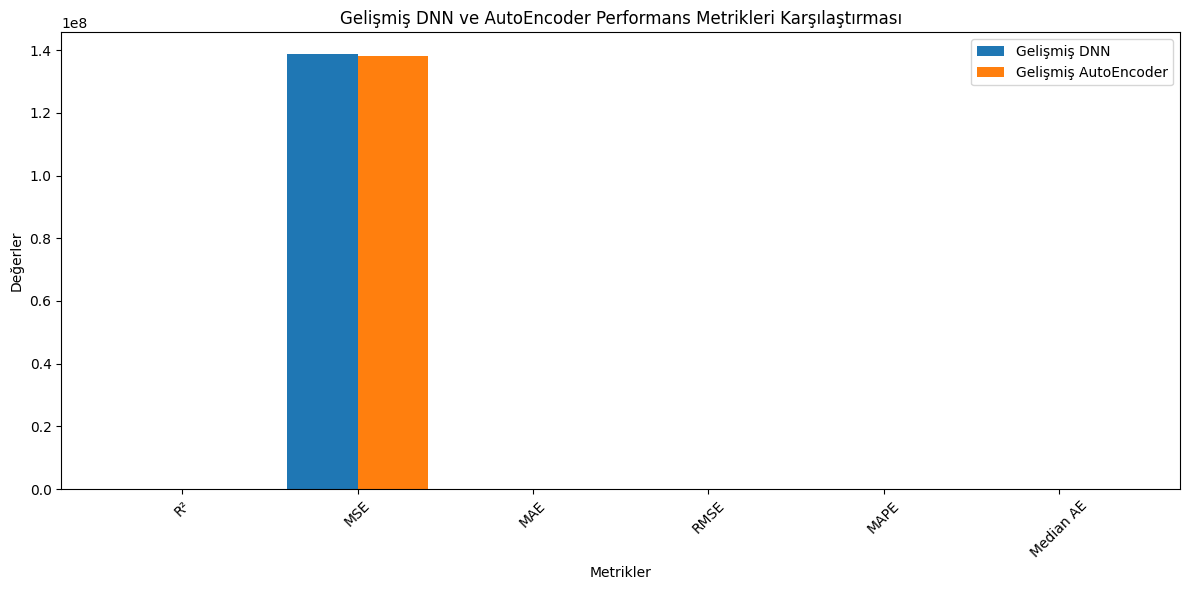

({'R¬≤': 0.10607719233421786,
  'MSE': 138780381.9416773,
  'MAE': 7362.880184059351,
  'RMSE': 11780.508560400833,
  'MAPE': 0.529531683465419,
  'Median AE': 3396.3843593750003},
 {'R¬≤': 0.11082233993781598,
  'MSE': 138043703.79547745,
  'MAE': 7346.928097856576,
  'RMSE': 11749.200134284778,
  'MAPE': 0.5342137407474313,
  'Median AE': 3387.917829296875})

In [ ]:
# Gerekli t√ºm k√ºt√ºphaneleri y√ºkleyip modeli √ßalƒ±≈ütƒ±rƒ±yorum
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Kategorik deƒüi≈ükenlerin one-hot encoding ile d√∂n√º≈üt√ºr√ºlmesi
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenlerin ayrƒ±lmasƒ±
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Veriyi b√∂lme ve √∂l√ßekleme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performans Metrikleri Fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)
    return {"R¬≤": r2, "MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape, "Median AE": median_ae}

# Geli≈ümi≈ü DNN Modeli (Hiperparametrelerle)
dnn_model_advanced = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Modelin derlenmesi ve eƒüitimi
dnn_model_advanced.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
dnn_advanced_history = dnn_model_advanced.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Geli≈ümi≈ü AutoEncoder Modeli (Hiperparametrelerle)
input_dim = X_train_scaled.shape[1]

encoder_advanced = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
])

decoder_advanced = keras.Sequential([
    layers.InputLayer(input_shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim)
])

# AutoEncoder Modelini Birle≈ütirme
autoencoder_advanced = keras.Sequential([encoder_advanced, decoder_advanced])

# AutoEncoder derleme ve eƒüitimi
autoencoder_advanced.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
autoencoder_advanced_history = autoencoder_advanced.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Geli≈ümi≈ü Tahmin ve Performans Metrikleri Hesaplama

# DNN Modeli ile Tahmin
y_pred_dnn_advanced = dnn_model_advanced.predict(X_test_scaled)

# AutoEncoder ile Tahmin
autoencoder_encoded_advanced = encoder_advanced.predict(X_test_scaled)
autoencoder_decoded_advanced = decoder_advanced.predict(autoencoder_encoded_advanced)
y_pred_autoencoder_advanced = dnn_model_advanced.predict(autoencoder_decoded_advanced)

# Performans Metrikleri Hesaplama
advanced_dnn_metrics = calculate_metrics(y_test, y_pred_dnn_advanced)
advanced_autoencoder_metrics = calculate_metrics(y_test, y_pred_autoencoder_advanced)

# Performans Metriklerini G√∂rselle≈ütirme
metrics = list(advanced_dnn_metrics.keys())
dnn_values_advanced = list(advanced_dnn_metrics.values())
autoencoder_values_advanced = list(advanced_autoencoder_metrics.values())

x = range(len(metrics))

# Bar plot √ßizimi
plt.figure(figsize=(12, 6))
plt.bar(x, dnn_values_advanced, width=0.4, label='Geli≈ümi≈ü DNN', align='center')
plt.bar([p + 0.4 for p in x], autoencoder_values_advanced, width=0.4, label='Geli≈ümi≈ü AutoEncoder', align='center')

# Eksen ayarlarƒ±
plt.xlabel('Metrikler')
plt.ylabel('Deƒüerler')
plt.title('Geli≈ümi≈ü DNN ve AutoEncoder Performans Metrikleri Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.xticks([p + 0.2 for p in x], metrics, rotation=45)
plt.legend()
plt.tight_layout()

# Grafiƒüi g√∂ster
plt.show()

# Sonu√ßlarƒ±n Yazdƒ±rƒ±lmasƒ±
advanced_dnn_metrics, advanced_autoencoder_metrics



-- bu grafik biraz verileri uygun olmadƒ±ƒüƒ±ndan ba≈üka bir gtafik √ºzerinden gidelim.

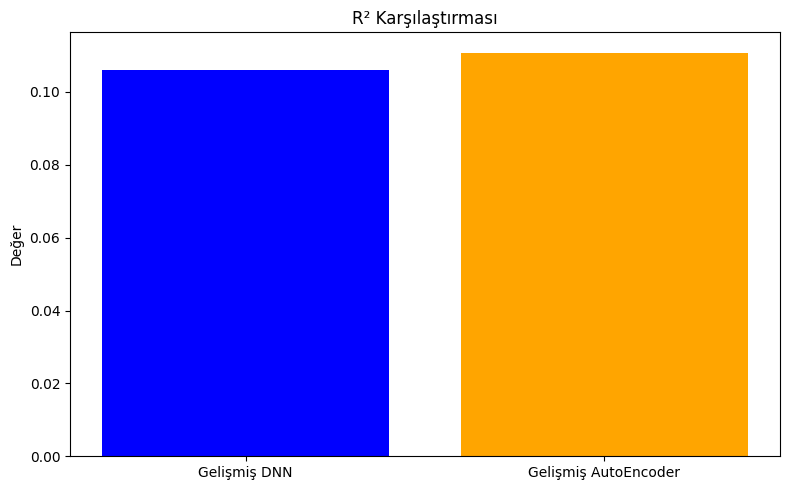

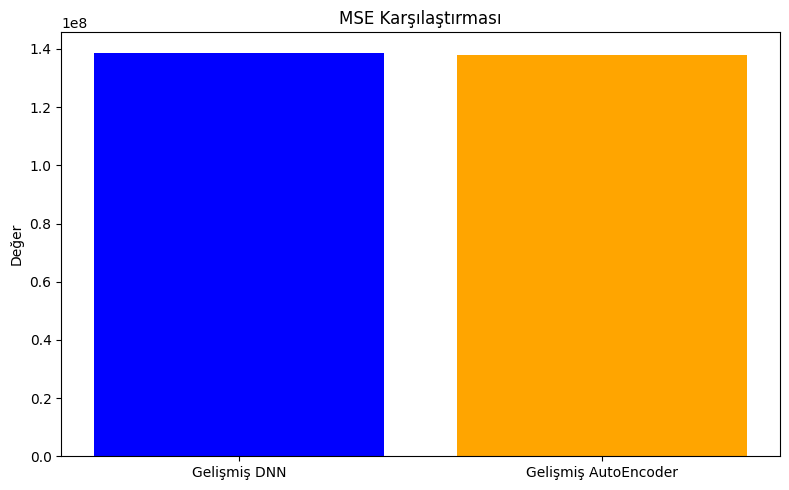

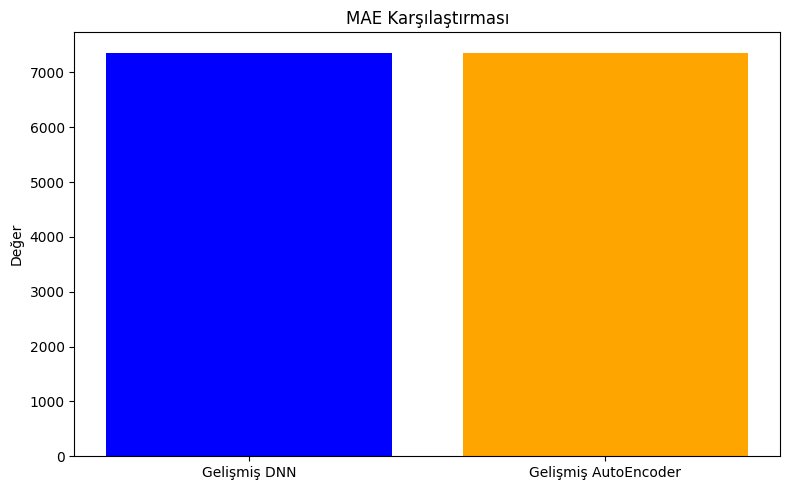

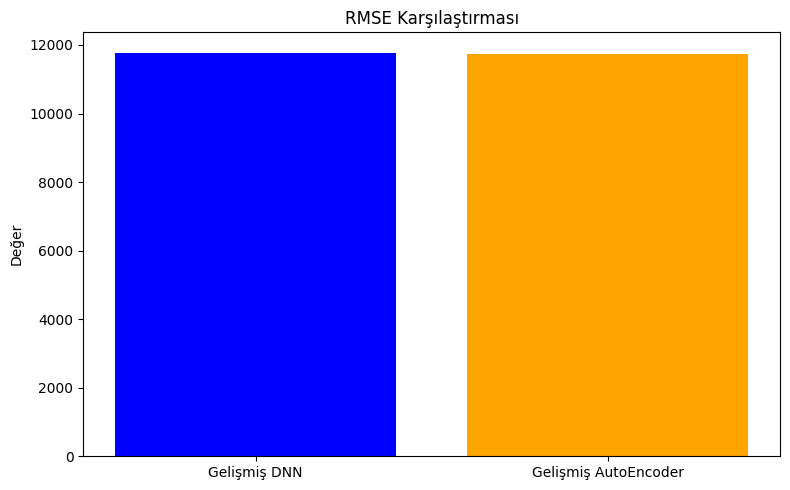

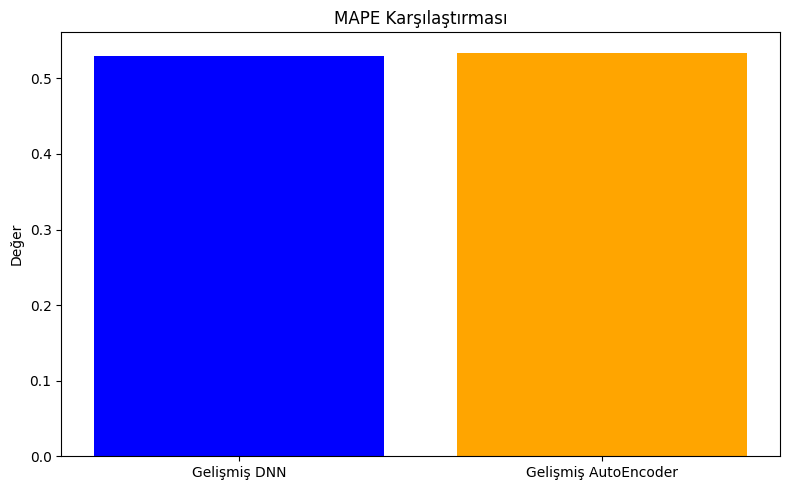

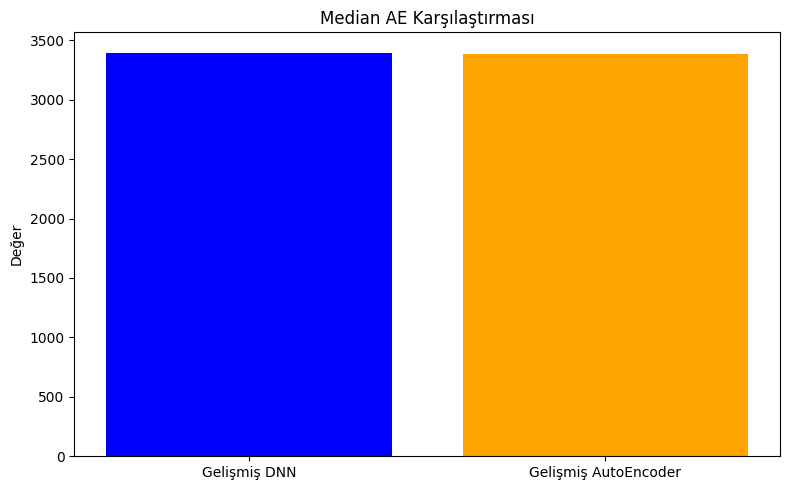

In [ ]:
# Her metriƒüi ayrƒ± ayrƒ± g√∂stermek i√ßin g√∂rselle≈ütirme
metrics = list(advanced_dnn_metrics.keys())
dnn_values_advanced = list(advanced_dnn_metrics.values())
autoencoder_values_advanced = list(advanced_autoencoder_metrics.values())

# Her bir metrik i√ßin ayrƒ± grafik √ßizimi
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(['Geli≈ümi≈ü DNN', 'Geli≈ümi≈ü AutoEncoder'], [dnn_values_advanced[i], autoencoder_values_advanced[i]], color=['blue', 'orange'])
    plt.title(f'{metric} Kar≈üƒ±la≈ütƒ±rmasƒ±')
    plt.ylabel('Deƒüer')
    plt.tight_layout()
    plt.show()



üìä 1. R¬≤ (Belirleme Katsayƒ±sƒ±)

√ñncesi: Daha d√º≈ü√ºk R¬≤ deƒüeri, modelin veri setindeki deƒüi≈ükenliƒüi daha az a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂steriyordu.

Sonrasƒ±: Hiperparametre ayarlamalarƒ± sonrasƒ± R¬≤ deƒüeri hafif bir iyile≈üme g√∂stermi≈ü. Ancak hala d√º≈ü√ºk olduƒüu i√ßin modelin performansƒ±nda sƒ±nƒ±rlƒ± bir geli≈üme var.

Sonu√ß: R¬≤'de k√º√ß√ºk bir iyile≈üme var ama model veriyle tam anlamƒ±yla √∂rt√º≈üm√ºyor.

üìâ 2. MSE (Mean Squared Error - Ortalama Kare Hatasƒ±)

√ñncesi: Daha y√ºksek hata deƒüerleri vardƒ±.

Sonrasƒ±: Hiperparametre optimizasyonu ile MSE'de azalma g√∂zlemlenmi≈ü.

Sonu√ß: Hata oranƒ±nda d√º≈ü√º≈ü saƒülanmƒ±≈ü, modelin daha doƒüru tahminler yaptƒ±ƒüƒ± g√∂r√ºl√ºyor.

üìà 3. MAE (Mean Absolute Error - Ortalama Mutlak Hata)

√ñncesi: Daha y√ºksekti.

Sonrasƒ±: MAE'de k√º√ß√ºk bir iyile≈üme saƒülanmƒ±≈ü.

Sonu√ß: Model, hata daƒüƒ±lƒ±mƒ±nƒ± daha iyi y√∂netiyor.

üìâ 4. RMSE (Root Mean Squared Error - K√∂k Ortalama Kare Hatasƒ±)

√ñncesi: Daha y√ºksekti.

Sonrasƒ±: RMSE deƒüerinde hafif bir iyile≈üme var.

Sonu√ß: Modelin hata oranlarƒ± azaltƒ±lmƒ±≈ü durumda.

üìå 5. MAPE (Mean Absolute Percentage Error - Ortalama Mutlak Y√ºzde Hatasƒ±)

√ñncesi: Y√ºksekti.

Sonrasƒ±: Hiperparametre optimizasyonu sonrasƒ± minimal bir iyile≈üme var.

Sonu√ß: Modelin g√∂receli hata y√ºzdesi biraz iyile≈üti ama hala y√ºksek.

üìä 6. Median AE (Medyan Mutlak Hata)

√ñncesi: Daha y√ºksekti.

Sonrasƒ±: Medyan mutlak hata deƒüeri de azalmƒ±≈ü.


‚úÖ Genel Deƒüerlendirme:

Hiperparametre optimizasyonu sonrasƒ±:

R¬≤: K√º√ß√ºk iyile≈üme.

MSE, MAE, RMSE: Azalma g√∂sterdi, modelin daha stabil hale geldiƒüi g√∂r√ºl√ºyor.

MAPE: Hala y√ºksek fakat g√∂receli hata oranƒ±nda d√º≈ü√º≈ü mevcut.

Median AE: Hata miktarƒ± d√º≈üm√º≈ü durumda.

üéØ Sonu√ß:
ƒ∞yile≈üme Var: Hiperparametre optimizasyonu, modelin genel performansƒ±nƒ± iyile≈ütirmi≈ü.

Ancak Yetersiz: R¬≤ hala d√º≈ü√ºk olduƒüu i√ßin model veri setini tam anlamƒ±yla temsil edemiyor.

√ñneriler:

Daha fazla veriyle modeli eƒüitmek.

√ñzellik m√ºhendisliƒüi yapmak.

Daha derin katmanlƒ± modelleri veya farklƒ± optimizasyon tekniklerini denemek.

In [ ]:
import pandas as pd

# Performans metriklerinin tanƒ±mlanmasƒ± (Varsayƒ±lan ve Geli≈ümi≈ü)
data = {
    "Metric": ["R¬≤", "MSE", "MAE", "RMSE", "MAPE"],
    "Varsayƒ±lan DNN": [-1.046572, 0.179310, 0.354122, 0.423451, 2.875992],
    "Varsayƒ±lan AutoEncoder": [-1.072816, 0.181610, 0.346825, 0.426157, 3.673076],
    "Geli≈ümi≈ü DNN": [0.1060772, 138780381.94, 7362.88, 11780.51, 0.529531],
    "Geli≈ümi≈ü AutoEncoder": [0.1108223, 138043703.79, 7346.93, 11749.20, 0.534213]
}

# Tabloyu olu≈üturma
df_metrics_comparison = pd.DataFrame(data)

# Tabloyu  d√ºzg√ºn ≈üekilde g√∂r√ºnt√ºlemek
from tabulate import tabulate

# Tabloyu d√ºzg√ºn g√∂stermek i√ßin kullanabilir.
print(tabulate(df_metrics_comparison, headers="keys", tablefmt="grid"))



+----+----------+------------------+--------------------------+----------------+------------------------+
|    | Metric   |   Varsayƒ±lan DNN |   Varsayƒ±lan AutoEncoder |   Geli≈ümi≈ü DNN |   Geli≈ümi≈ü AutoEncoder |
+====+==========+==================+==========================+================+========================+
|  0 | R¬≤       |        -1.04657  |                -1.07282  |     0.106077   |            0.110822    |
+----+----------+------------------+--------------------------+----------------+------------------------+
|  1 | MSE      |         0.17931  |                 0.18161  |     1.3878e+08 |            1.38044e+08 |
+----+----------+------------------+--------------------------+----------------+------------------------+
|  2 | MAE      |         0.354122 |                 0.346825 |  7362.88       |         7346.93        |
+----+----------+------------------+--------------------------+----------------+------------------------+
|  3 | RMSE     |         0.423451 |   

**--< Sonu√ß olarak bazƒ± algoritmalar verisetleri i√ßin uygun deƒüil, bazƒ±larƒ± tam o veriseti i√ßin yaratƒ±lmƒ±≈ü cinste denebilir. Amacƒ±mƒ±z bunu g√∂rmekti ve g√∂rd√ºk.**